# Sklearn Random Forest Regression for seasonal selections

###### Load modules 

The following conditions apply:

 - env = biomass_zonal
 - data merged_slats_field_agb_dp1_start.csv

In [1]:
!pip install xgboost

In [60]:


%matplotlib inline
import sklearn
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np
from random import sample
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import ExtraTreesRegressor as etr
from sklearn.ensemble import GradientBoostingRegressor as gbr
from sklearn.ensemble import AdaBoostRegressor as abr
from sklearn.tree import DecisionTreeRegressor as dtr
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split


# import plotting and stats modules

import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import scipy.stats as sc
import numpy as np
from glob import glob

# stats module
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

from bokeh.io import output_notebook, output_file
from bokeh.plotting import figure, show, save
#%matplotlib inline

# Bokeh Libraries
# from bokeh.plotting import figure, show
# from bokeh.io import output_file
from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool


from sklearn.model_selection import cross_validate
#sklearn.model_selection.cross_validate
# from sklearn import cross_validation
from sklearn.metrics import explained_variance_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation import KFold
import pickle5 as Pickle

In [61]:
import numpy as np

from scipy.stats import uniform, randint

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb

In [62]:
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
 
date_str = now.strftime("%Y%m%d")
date_time_str = now.strftime("%Y%m%d_%H%M%S")
print(date_str)
print(date_time_str)

20230203
20230203_094246


### Import data

In [12]:
#date_str = "20230201"
drive = "F"
data_date = "20230201"
# define output directory
output_dir = r"{0}:\cdu\data\zonal_stats\output\{1}".format(drive, date_str)
export_dir = os.path.join(output_dir, date_time_str)

# data dir
dir_ = r"{0}:\cdu\data\zonal_stats\output\{1}\ml_data_si_dir".format(drive, data_date)

index_ = 0


In [13]:
def mk_dir_fn(dir_):
    """ Create a new directory if one does not already exist. """
    if not os.path.isdir(dir_):
        os.mkdir(dir_)

        
def export_csv_fn(list_, dir_, file_name):
    
    """ Create and export path from directory and file name and exports csv with no dropping the index column. """
    
    df_final = pd.concat(list_, axis =0)    
    output_path = os.path.join(dir_, file_name)
    df_final.to_csv(os.path.join(output_path), index=False)
    print("File output to: ", output_path)
    
    return df_final

## Set output file locations

## Load data

In [14]:
file_list = []
for f in glob(os.path.join(dir_, "*class.csv")):
    print(f)
    file_list.append(f)


F:\cdu\data\zonal_stats\output\20230201\ml_data_si_dir\season_NO_climate_fillna_mean_fms_NOT_si_class.csv
F:\cdu\data\zonal_stats\output\20230201\ml_data_si_dir\r2_best_season_NO_climate_fillna_fms_NOT_si_class.csv


In [15]:
_, file_name = os.path.split(file_list[index_])
split_list = file_name.split(".")
data_set = split_list[0]

In [16]:
data_set

'season_NO_climate_fillna_mean_fms_NOT_si_class'

In [17]:
ml_rf_reg_dir= os.path.join(output_dir, "ml_xgBoost_dir")
data_set_dir= os.path.join(ml_rf_reg_dir, data_set)
export_ml_rf_reg_dir = os.path.join(data_set_dir, date_time_str)
# plots_dir = os.path.join(export_ml_rf_reg_dir, data_set)
all_plots_dir = os.path.join(export_ml_rf_reg_dir, "all_plots")
# no_tern_plots_dir = os.path.join(plots_dir, "no_tern")
# mk_dir_fn(output_dir)
mk_dir_fn(ml_rf_reg_dir)
mk_dir_fn(data_set_dir)
mk_dir_fn(export_ml_rf_reg_dir)
# mk_dir_fn(plots_dir)
mk_dir_fn(all_plots_dir)
# mk_dir_fn(no_tern_plots_dir)

In [18]:
export_ml_rf_reg_dir

'F:\\cdu\\data\\zonal_stats\\output\\20230203\\ml_xgBoost_dir\\season_NO_climate_fillna_mean_fms_NOT_si_class\\20230203_092613'

In [19]:
df = pd.read_csv(file_list[index_], header=0)

In [20]:
df

target        site  uid      date  bio_agb_kg1ha  b1_fpca2_0509_min  \
0       c0       nt001  119  20110523           0.00              13.78   
1       c0   barkely01   42  20111025           0.00               0.75   
2       c0   barkely02   43  20111026           0.00               2.12   
3       c0   barkely04   45  20111026           0.00               2.12   
4       c0   barkely03   44  20111026           0.00               0.75   
..     ...         ...  ...       ...            ...                ...   
162     c4  ntadac0002    5  20160506       20805.22              15.54   
163     c5  ntaarp0001    1  20160602       30472.45              27.61   
164     c4  ntaarp0002    2  20160602       24414.13               9.06   
165     c3  ntaarp0003    3  20160603       17598.35               5.26   
166     c2      buff01    3  20210713        9995.51              19.30   

     b1_fpca2_0509_max  b1_fpca2_0509_mean  b1_fpca2_0509_med  \
0                47.00               25.85              23.87   
1                 2.87                1.69               1.49   
2                13.78                4.97               4.73   
3                 6.42                4.37               4.47   
4                 3.29                1.82               1.64   
..                 ...                 ...                ...   
162              42.39               29.12              29.27   
163              38.92               34.75              34.33   
164              22.31               14.40              14.21   
165              25.45               13.08              12.11   
166              40.08               30.47              32.06   

     b1_fpca2_0509_std  ...    NDGIm      RIm     NBRm    NDIIm    GDVIm  \
0                 8.48  ... -1797183  1797183   803085 -1648544  1653000   
1                 0.70  ... -1237840  1237840   145478 -1258856  1100000   
2                 2.43  ... -1563211  1563211   758167  -969300  1320000   
3                 1.22  ... -1493838  1493838   965693  -982236  1174000   
4                 0.70  ... -1481481  1481481    -2046 -1713026  1178000   
..                 ...  ...      ...      ...      ...      ...      ...   
162               6.84  ...  -652174   652174  4386747  1261845  1828000   
163               3.24  ... -1485714  1485714  4017258  1123510  1746000   
164               3.60  ... -2065698  2065698  2615783   222222  1810000   
165               5.79  ... -1885790  1885790  2958064   395123  1691000   
166               6.23  ...   770925  -770925  5614599  2339640  2185000   

      MSAVIm     DVIm    SAVIm    NDVIm      MSRm  
0    2108509  1334000  2374229  3891482   5080174  
1    1063379   731000  1207466  1791228   1985065  
2    1195078   839000  1339257  1908119   2131007  
3     951763   677000  1068835  1504110   1636492  
4    1068186   738000  1210101  1779171   1970149  
..       ...      ...      ...      ...       ...  
162  3096442  1768000  3422819  6433770  11466633  
163  2727661  1590000  3059261  5686695   9070438  
164  2372051  1483000  2650423  4370763   5977733  
165  2284112  1407000  2574722  4401001   6037665  
166  3960474  2255000  4179538  7290656  15262347  

[167 rows x 163 columns]

In [22]:
t_list = []
for i in df.target:
    x = int(i[1])
    t_list.append(x)
    
df["target"] = t_list    

In [23]:
df

target        site  uid      date  bio_agb_kg1ha  b1_fpca2_0509_min  \
0         0       nt001  119  20110523           0.00              13.78   
1         0   barkely01   42  20111025           0.00               0.75   
2         0   barkely02   43  20111026           0.00               2.12   
3         0   barkely04   45  20111026           0.00               2.12   
4         0   barkely03   44  20111026           0.00               0.75   
..      ...         ...  ...       ...            ...                ...   
162       4  ntadac0002    5  20160506       20805.22              15.54   
163       5  ntaarp0001    1  20160602       30472.45              27.61   
164       4  ntaarp0002    2  20160602       24414.13               9.06   
165       3  ntaarp0003    3  20160603       17598.35               5.26   
166       2      buff01    3  20210713        9995.51              19.30   

     b1_fpca2_0509_max  b1_fpca2_0509_mean  b1_fpca2_0509_med  \
0                47.00               25.85              23.87   
1                 2.87                1.69               1.49   
2                13.78                4.97               4.73   
3                 6.42                4.37               4.47   
4                 3.29                1.82               1.64   
..                 ...                 ...                ...   
162              42.39               29.12              29.27   
163              38.92               34.75              34.33   
164              22.31               14.40              14.21   
165              25.45               13.08              12.11   
166              40.08               30.47              32.06   

     b1_fpca2_0509_std  ...    NDGIm      RIm     NBRm    NDIIm    GDVIm  \
0                 8.48  ... -1797183  1797183   803085 -1648544  1653000   
1                 0.70  ... -1237840  1237840   145478 -1258856  1100000   
2                 2.43  ... -1563211  1563211   758167  -969300  1320000   
3                 1.22  ... -1493838  1493838   965693  -982236  1174000   
4                 0.70  ... -1481481  1481481    -2046 -1713026  1178000   
..                 ...  ...      ...      ...      ...      ...      ...   
162               6.84  ...  -652174   652174  4386747  1261845  1828000   
163               3.24  ... -1485714  1485714  4017258  1123510  1746000   
164               3.60  ... -2065698  2065698  2615783   222222  1810000   
165               5.79  ... -1885790  1885790  2958064   395123  1691000   
166               6.23  ...   770925  -770925  5614599  2339640  2185000   

      MSAVIm     DVIm    SAVIm    NDVIm      MSRm  
0    2108509  1334000  2374229  3891482   5080174  
1    1063379   731000  1207466  1791228   1985065  
2    1195078   839000  1339257  1908119   2131007  
3     951763   677000  1068835  1504110   1636492  
4    1068186   738000  1210101  1779171   1970149  
..       ...      ...      ...      ...       ...  
162  3096442  1768000  3422819  6433770  11466633  
163  2727661  1590000  3059261  5686695   9070438  
164  2372051  1483000  2650423  4370763   5977733  
165  2284112  1407000  2574722  4401001   6037665  
166  3960474  2255000  4179538  7290656  15262347  

[167 rows x 163 columns]

In [12]:
# drop_list = ['dis_one', 'dis_two', 'dis_three', 'dis_four', 'dis_five', 'dis_six', 'dis_seven', 'dis_eight', 'dis_nine', 'dis_ten',
#  'dka_jan', 'dka_feb', 'dka_mar', 'dka_april', 'dka_may', 'dka_june', 'dka_july', 'dka_aug', 'dka_sep', 'dka_oct', 'dka_nov', 'dka_dec',
#     'stc_one', 'stc_two', 'stc_three', 'stc_four', 'stc_five', 'stc_six', 'stc_seven', 'stc_eight', 'stc_nine', 'stc_ten', 'stc_elev', 
#     'stc_twelv', 'stc_thirt', 'stc_fourt', 'stc_fift', 'stc_sixt', 'stc_sevent', 'dka_sum', 'dka_sum.1', 'dka_sum.2', 'dka_sum.3', 
#              'stc_sum', 'stc_sum.1', 'stc_sum.2', 'stc_sum.3']


In [24]:
df2 = df.copy(deep=True)

In [25]:
print(list(df2.columns))

['target', 'site', 'uid', 'date', 'bio_agb_kg1ha', 'b1_fpca2_0509_min', 'b1_fpca2_0509_max', 'b1_fpca2_0509_mean', 'b1_fpca2_0509_med', 'b1_fpca2_0509_std', 'b1_h99a_01122_min', 'b1_h99a_01122_max', 'b1_h99a_01122_mean', 'b1_h99a_01122_med', 'b1_h99a_01122_std', 'b1_dbi_0608_min', 'b1_dbi_0608_max', 'b1_dbi_0608_mean', 'b1_dbi_0608_med', 'b1_dbi_0608_std', 'b2_dbi_0608_min', 'b2_dbi_0608_max', 'b2_dbi_0608_mean', 'b2_dbi_0608_med', 'b2_dbi_0608_std', 'b3_dbi_0608_min', 'b3_dbi_0608_max', 'b3_dbi_0608_mean', 'b3_dbi_0608_med', 'b3_dbi_0608_std', 'b4_dbi_0608_min', 'b4_dbi_0608_max', 'b4_dbi_0608_mean', 'b4_dbi_0608_med', 'b4_dbi_0608_std', 'b5_dbi_0608_min', 'b5_dbi_0608_max', 'b5_dbi_0608_mean', 'b5_dbi_0608_med', 'b5_dbi_0608_std', 'b6_dbi_0608_min', 'b6_dbi_0608_max', 'b6_dbi_0608_mean', 'b6_dbi_0608_med', 'b6_dbi_0608_std', 'b1_dja_0305_min', 'b1_dja_0305_max', 'b1_dja_0305_mean', 'b1_dja_0305_med', 'b1_dja_0305_std', 'b1_dp1_0112_min', 'b1_dp1_0112_max', 'b1_dp1_0112_mean', 'b1_dp1

### Set variables to plot

In [26]:
# # predicted value is x
# value_x = 'bio_agb_kg1ha'
# # variable is y
# value_y = "b1_h99a_01122_mean"
# value_a = 'date'
# value_b = 'b1_fpca2_0509_mean'


In [27]:
# value_y

In [28]:
# df2.shape

In [29]:
def save_fig(value_x, value_y, value_a, value_b, out_file):
    # Output to file
    output_file(out_file, 
                title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")))



    #Specify the selection tools to be made available
    select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'zoom_in', 'zoom_out', 'wheel_zoom', 'reset']

    #print(test)
    # Format the tooltip
    tooltips = [
                ('Site', '@site'),
                ('Date', '@date'),
                (value_x, '@{0}'.format(value_x)),
                (value_y, '@{0}'.format(value_y)),   
                (value_a, '@{0}'.format(value_a)),
                (value_b, '@{0}'.format(value_b)) 
               ]

    # Create the figure
    fig = figure(plot_height=400,
                 plot_width=1500,
                 y_axis_label= value_y.replace("_", " "), 
                 x_axis_label= value_x.replace("_", " "),
                 title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")),
                 toolbar_location='below',
                 tools=select_tools)

    # # Format the y-axis tick label
    fig.yaxis[0].formatter = NumeralTickFormatter(format='0')

    # Add square representing each site
    fig.square(x= value_x,
               y= value_y,
               source=df2.round(4),
               size=5,
               color='royalblue',
               selection_color='deepskyblue',
               nonselection_color='lightgray',
               nonselection_alpha=0.3)

    # Add the HoverTool to the figure
    fig.add_tools(HoverTool(tooltips=tooltips))

    # Visualize
    save(fig)

In [30]:
# save_fig(value_x, value_y)

In [31]:
# column_list

In [32]:
column_list = df2.columns.to_list()
y_list = column_list[5:]
value_x = column_list[:1][0]

value_a = 'date'
value_b = 'b1_fpca2_0509_mean'


for i in y_list:
    value_y = i
    
    out_file = os.path.join(all_plots_dir,'all_sites_{0}_{1}.html'.format(value_x, value_y))
    save_fig(value_x, value_y, value_a, value_b, out_file)
    

### Drop AGB numbers which are high

In [33]:
# # drop the 7 tern sites that apear to be outliers
# df3 =df2[df2[value_x] <= 100000]
# df3.to_csv(os.path.join(output_dir, "{0}_lt_100000.csv".format(value_x)))
# drop_sites =df2[df2[value_x] > 100000]
# drop_sites.value_counts(['site', value_x, value_y])


In [34]:
# df3.shape

In [35]:

# # Output to file
# output_file(os.path.join(output_, 'TERN7_removed_sites_{0}_{1}.html'.format(value_x, value_y)),
#             title='Seven TERN sites removed - relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")))


# #Specify the selection tools to be made available
# select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'zoom_in', 'zoom_out', 'wheel_zoom', 'reset']

# # Format the tooltip
# tooltips = [
#             ('Site', '@site'),
#             ('Date', '@date'),
#             (value_x, '@{0}'.format(value_x)),
#             (value_y, '@{0}'.format(value_y)),
#             (value_a, '@{0}'.format(value_a)),
#             (value_b, '@{0}'.format(value_b)) 
#            ]

# # Create the figure
# fig = figure(plot_height=400,
#              plot_width=1500,
#              y_axis_label= value_y.replace("_", " "), 
#              x_axis_label= value_x.replace("_", " "),
#              title='Seven TERN sites removed - relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")),
#              toolbar_location='below',
#              tools=select_tools)

# # # Format the y-axis tick label
# fig.yaxis[0].formatter = NumeralTickFormatter(format='0')

# # Add square representing each site
# fig.square(x= value_x,
#            y= value_y,
#            source=df3,
#            size=5,
#            color='royalblue',
#            selection_color='deepskyblue',
#            nonselection_color='lightgray',
#            nonselection_alpha=0.3)

# # Add the HoverTool to the figure
# fig.add_tools(HoverTool(tooltips=tooltips))

# # Visualize
# show(fig)

### Drop the TERN sites for review

In [36]:
# # drop the TERN sites due to 
# df4=df3[df3.site.apply(lambda x: len(str(x))<=9)]
# df4.to_csv(os.path.join(output_dir, "{0}_NTG_only.csv".format(value_x)))

In [37]:
# column_list = df4.columns.to_list()
# y_list = column_list[5:]
# value_x = column_list[:1][0]

# value_a = 'date'
# value_b = 'b1_fpca2_0509_mean'


# for i in y_list:
#     value_y = i
    
#     out_file = os.path.join(no_tern_plots_dir,'no_tern_sites_{0}_{1}.html'.format(value_x, value_y))
#     save_fig(value_x, value_y, value_a, value_b, out_file)

## Choose which data set to run the models from

In [38]:
df_ml = df2
# df_ml = df

In [39]:
print(list(df_ml.columns))

['target', 'site', 'uid', 'date', 'bio_agb_kg1ha', 'b1_fpca2_0509_min', 'b1_fpca2_0509_max', 'b1_fpca2_0509_mean', 'b1_fpca2_0509_med', 'b1_fpca2_0509_std', 'b1_h99a_01122_min', 'b1_h99a_01122_max', 'b1_h99a_01122_mean', 'b1_h99a_01122_med', 'b1_h99a_01122_std', 'b1_dbi_0608_min', 'b1_dbi_0608_max', 'b1_dbi_0608_mean', 'b1_dbi_0608_med', 'b1_dbi_0608_std', 'b2_dbi_0608_min', 'b2_dbi_0608_max', 'b2_dbi_0608_mean', 'b2_dbi_0608_med', 'b2_dbi_0608_std', 'b3_dbi_0608_min', 'b3_dbi_0608_max', 'b3_dbi_0608_mean', 'b3_dbi_0608_med', 'b3_dbi_0608_std', 'b4_dbi_0608_min', 'b4_dbi_0608_max', 'b4_dbi_0608_mean', 'b4_dbi_0608_med', 'b4_dbi_0608_std', 'b5_dbi_0608_min', 'b5_dbi_0608_max', 'b5_dbi_0608_mean', 'b5_dbi_0608_med', 'b5_dbi_0608_std', 'b6_dbi_0608_min', 'b6_dbi_0608_max', 'b6_dbi_0608_mean', 'b6_dbi_0608_med', 'b6_dbi_0608_std', 'b1_dja_0305_min', 'b1_dja_0305_max', 'b1_dja_0305_mean', 'b1_dja_0305_med', 'b1_dja_0305_std', 'b1_dp1_0112_min', 'b1_dp1_0112_max', 'b1_dp1_0112_mean', 'b1_dp1

In [40]:
# drop some of the unwanted values
df_ml.drop(['site', 'uid', 'date', 'bio_agb_kg1ha'], axis=1, inplace=True) # 'date',
#df_ml.drop(['fpca2_imdate'], axis=1, inplace=True)

In [41]:
print(list(df_ml))

['target', 'b1_fpca2_0509_min', 'b1_fpca2_0509_max', 'b1_fpca2_0509_mean', 'b1_fpca2_0509_med', 'b1_fpca2_0509_std', 'b1_h99a_01122_min', 'b1_h99a_01122_max', 'b1_h99a_01122_mean', 'b1_h99a_01122_med', 'b1_h99a_01122_std', 'b1_dbi_0608_min', 'b1_dbi_0608_max', 'b1_dbi_0608_mean', 'b1_dbi_0608_med', 'b1_dbi_0608_std', 'b2_dbi_0608_min', 'b2_dbi_0608_max', 'b2_dbi_0608_mean', 'b2_dbi_0608_med', 'b2_dbi_0608_std', 'b3_dbi_0608_min', 'b3_dbi_0608_max', 'b3_dbi_0608_mean', 'b3_dbi_0608_med', 'b3_dbi_0608_std', 'b4_dbi_0608_min', 'b4_dbi_0608_max', 'b4_dbi_0608_mean', 'b4_dbi_0608_med', 'b4_dbi_0608_std', 'b5_dbi_0608_min', 'b5_dbi_0608_max', 'b5_dbi_0608_mean', 'b5_dbi_0608_med', 'b5_dbi_0608_std', 'b6_dbi_0608_min', 'b6_dbi_0608_max', 'b6_dbi_0608_mean', 'b6_dbi_0608_med', 'b6_dbi_0608_std', 'b1_dja_0305_min', 'b1_dja_0305_max', 'b1_dja_0305_mean', 'b1_dja_0305_med', 'b1_dja_0305_std', 'b1_dp1_0112_min', 'b1_dp1_0112_max', 'b1_dp1_0112_mean', 'b1_dp1_0112_std', 'b1_dp1_0112_med', 'b2_dp1_0

In [42]:
df_ml.shape

(167, 159)

In [43]:
df_ml.head(5)

target  b1_fpca2_0509_min  b1_fpca2_0509_max  b1_fpca2_0509_mean  \
0       0              13.78              47.00               25.85   
1       0               0.75               2.87                1.69   
2       0               2.12              13.78                4.97   
3       0               2.12               6.42                4.37   
4       0               0.75               3.29                1.82   

   b1_fpca2_0509_med  b1_fpca2_0509_std  b1_h99a_01122_min  b1_h99a_01122_max  \
0              23.87               8.48               7.27              11.78   
1               1.49               0.70               4.38               8.97   
2               4.73               2.43               3.13               5.82   
3               4.47               1.22               5.93               8.85   
4               1.64               0.70               3.66               7.09   

   b1_h99a_01122_mean  b1_h99a_01122_med  ...    NDGIm      RIm    NBRm  \
0                9.24               8.86  ... -1797183  1797183  803085   
1                6.83               7.18  ... -1237840  1237840  145478   
2                4.55               4.43  ... -1563211  1563211  758167   
3                7.68               7.68  ... -1493838  1493838  965693   
4                4.98               4.85  ... -1481481  1481481   -2046   

     NDIIm    GDVIm   MSAVIm     DVIm    SAVIm    NDVIm     MSRm  
0 -1648544  1653000  2108509  1334000  2374229  3891482  5080174  
1 -1258856  1100000  1063379   731000  1207466  1791228  1985065  
2  -969300  1320000  1195078   839000  1339257  1908119  2131007  
3  -982236  1174000   951763   677000  1068835  1504110  1636492  
4 -1713026  1178000  1068186   738000  1210101  1779171  1970149  

[5 rows x 159 columns]

## Qty of 0 values dataset 

In [44]:
model_data = df_ml
model_data_name = "all_values"

# ## Filter out all taregt == 0 values
# model_data = df_ml[df_ml['target']>0.0]
# model_data_name = "no0_values"

# ## Select a randon number of 0 values
# n = 3
# agb_0 = df_ml[df_ml['target']==0.0].sample(n)
# model_data = pd.concat([df_ml[df_ml['target']>0.0], agb_0])
# model_data_name = f"s{n}_0_values"


model_outputs = os.path.join(export_ml_rf_reg_dir, f"{model_data_name}")
mk_dir_fn(model_outputs)

print(model_outputs)

F:\cdu\data\zonal_stats\output\20230203\ml_xgBoost_dir\season_NO_climate_fillna_mean_fms_NOT_si_class\20230203_092613\all_values


In [45]:
model_data.dropna(inplace=True)

 Define if you are using all variabes or selected variables

# Scatter plots with error

b1_fpca2_0509_min
slope:  3.040645357909495
intersept:  1.9965922155827052
r2:  0.5016004444240335
P_value:  5.019415775598486e-12
std error:  0.40825536649356076


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


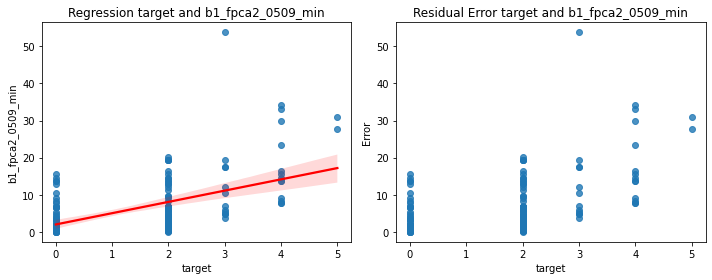

b1_fpca2_0509_max
slope:  5.009822965916711
intersept:  9.27939508751038
r2:  0.5195615481553635
P_value:  6.266216377922793e-13
std error:  0.6413888888115309


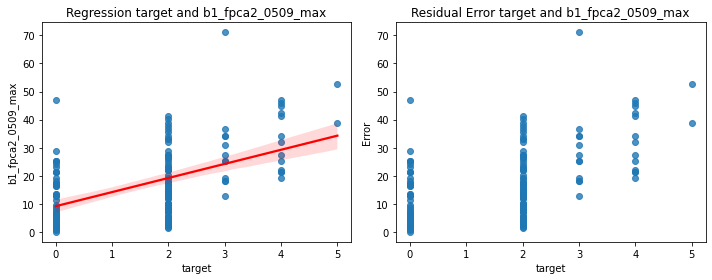

b1_fpca2_0509_mean
slope:  4.088787279723292
intersept:  4.7843646738351175
r2:  0.5323726036572036
P_value:  1.3160890852566987e-13
std error:  0.506138075411006


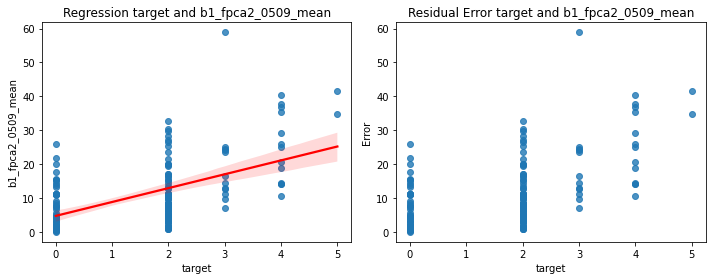

b1_fpca2_0509_med
slope:  4.090035868959168
intersept:  4.535666547265041
r2:  0.5252609134849096
P_value:  3.1551088971573377e-13
std error:  0.515833597575715


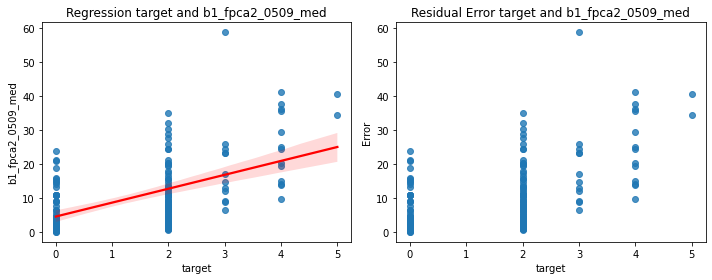

b1_fpca2_0509_std
slope:  0.5050594417475651
intersept:  2.0015046475245875
r2:  0.33942016081687
P_value:  7.214146737533515e-06
std error:  0.108964231604947


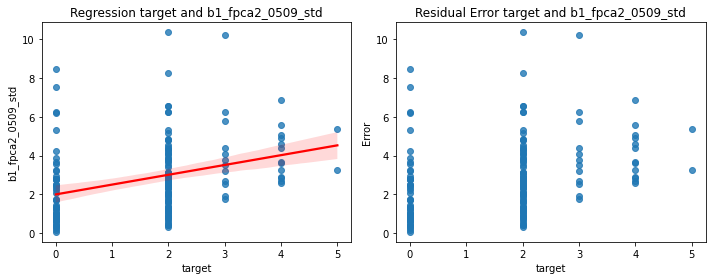

b1_h99a_01122_min
slope:  1.3664233099395857
intersept:  5.278433506059601
r2:  0.4656312466453805
P_value:  2.288154430628672e-10
std error:  0.20217807582125658


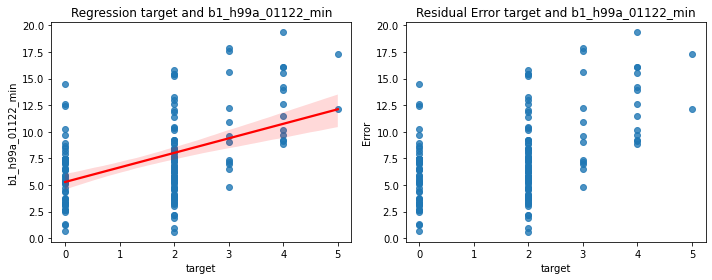

b1_h99a_01122_max
slope:  1.9007676605136732
intersept:  9.220670896022813
r2:  0.5354215263905135
P_value:  8.989776858751237e-14
std error:  0.23341813153419413


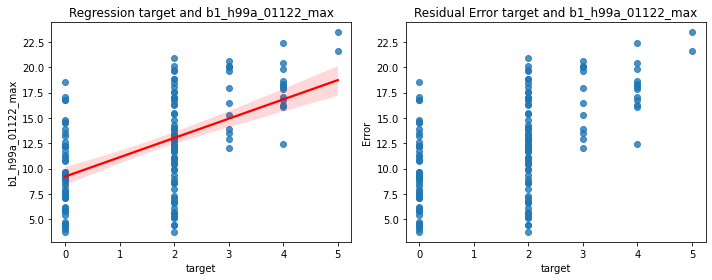

b1_h99a_01122_mean
slope:  1.5974611932774003
intersept:  7.224282217166154
r2:  0.50704278844623
P_value:  2.7064432427334956e-12
std error:  0.21140299616149938


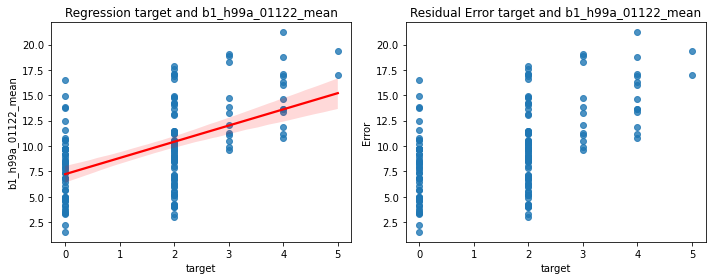

b1_h99a_01122_med
slope:  1.5795637943820589
intersept:  7.230671072478577
r2:  0.49886911059219213
P_value:  6.815612280453071e-12
std error:  0.21363186216417834


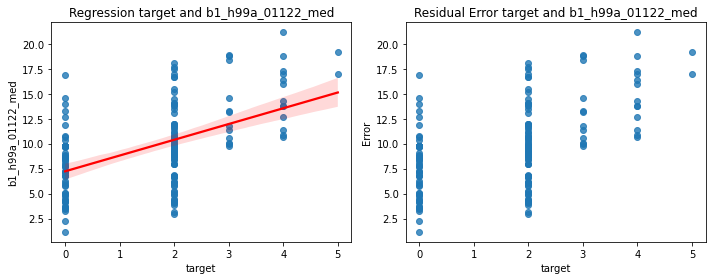

b1_h99a_01122_std
slope:  0.12595965268092799
intersept:  1.0790630727346475
r2:  0.2668788027602465
P_value:  0.0004896009957411667
std error:  0.035410399366563615


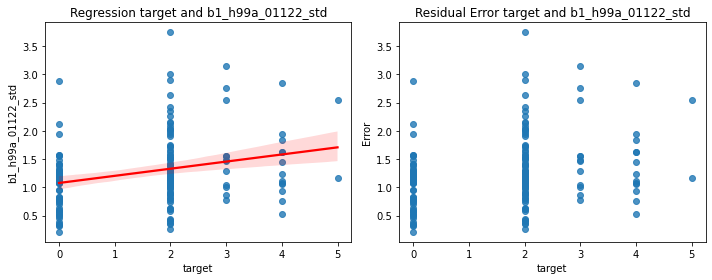

b1_dbi_0608_min
slope:  -84.52082355451232
intersept:  584.2065713676122
r2:  -0.5338653890921006
P_value:  1.0925581291252632e-13
std error:  10.421717130932635


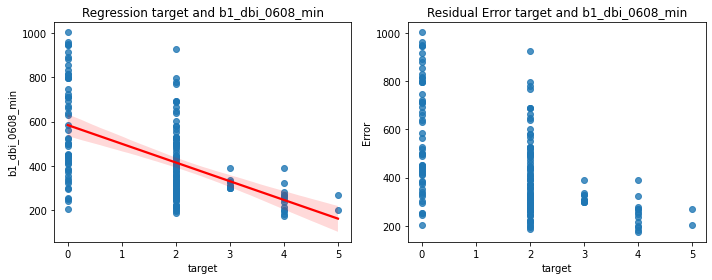

b1_dbi_0608_max
slope:  -88.37738425432023
intersept:  718.99778109665
r2:  -0.5067123753641786
P_value:  2.8107401663877815e-12
std error:  11.70584981777081


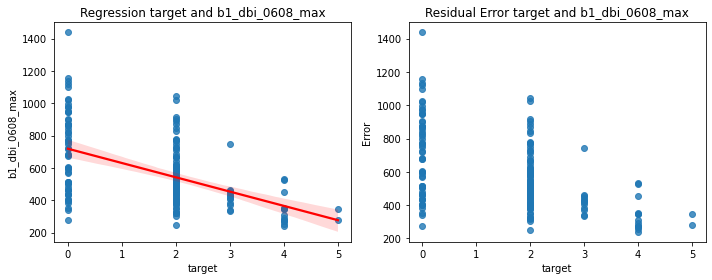

b1_dbi_0608_mean
slope:  -87.92608102197546
intersept:  650.7295532323445
r2:  -0.5387734817415575
P_value:  5.886127154996463e-14
std error:  10.703209197287832


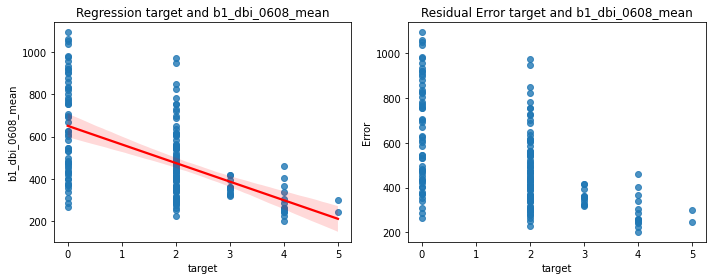

b1_dbi_0608_med
slope:  -88.259430339236
intersept:  650.0628120332833
r2:  -0.5402770582455624
P_value:  4.860332070663436e-14
std error:  10.701634973431648


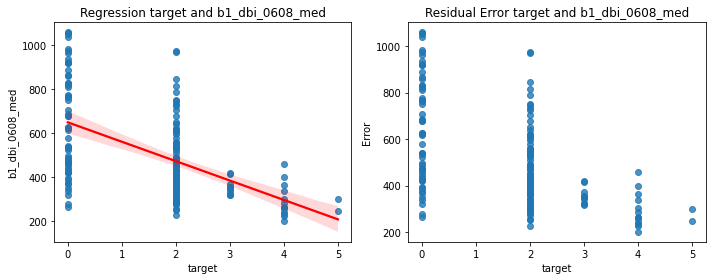

b1_dbi_0608_std
slope:  -0.9881561264116487
intersept:  36.607858362644045
r2:  -0.049820619331486134
P_value:  0.5225719890126832
std error:  1.5421791366958955


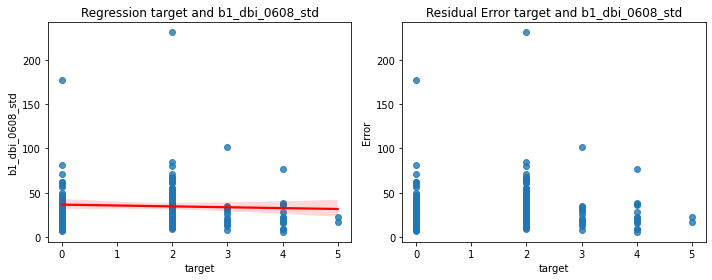

b2_dbi_0608_min
slope:  -121.91708982291414
intersept:  905.515639001493
r2:  -0.539874667750479
P_value:  5.116381346703002e-14
std error:  14.798252210781731


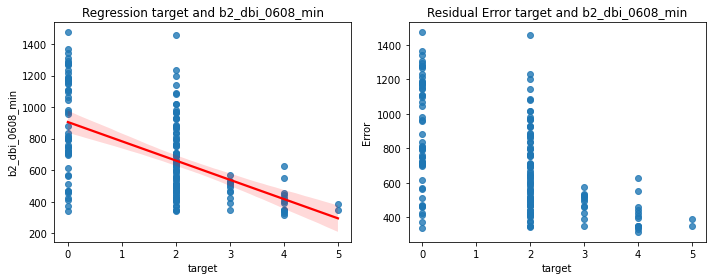

b2_dbi_0608_max
slope:  -125.22588009387641
intersept:  1092.6085769148704
r2:  -0.4915435174569523
P_value:  1.527794241226653e-11
std error:  17.271696836427896


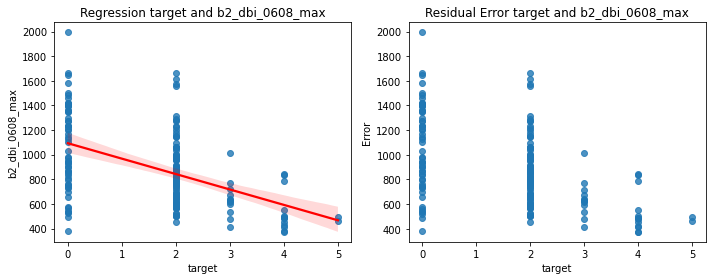

b2_dbi_0608_mean
slope:  -126.42566033710234
intersept:  999.328753467036
r2:  -0.538706457399275
P_value:  5.936455081284389e-14
std error:  15.392446506388342


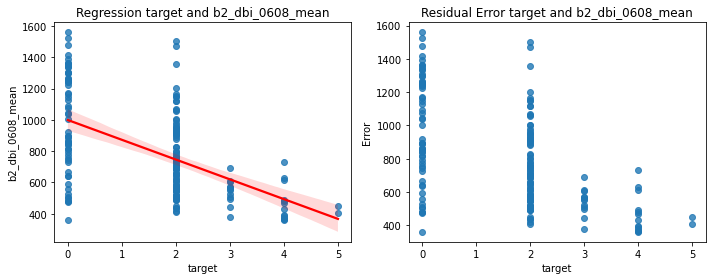

b2_dbi_0608_med
slope:  -127.49125240025579
intersept:  998.8783870279492
r2:  -0.5436197253920928
P_value:  3.164409903962412e-14
std error:  15.32416434442125


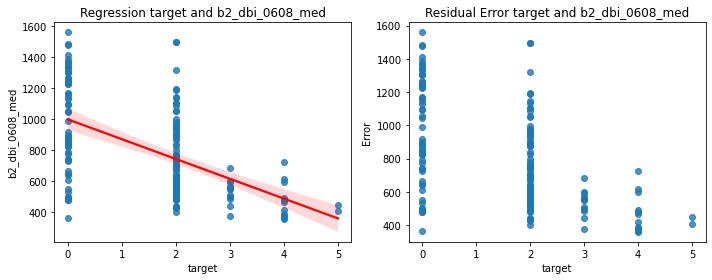

b2_dbi_0608_std
slope:  -0.742375954123649
intersept:  51.276282390236865
r2:  -0.022792631773165418
P_value:  0.7700026798707102
std error:  2.5349804353518213


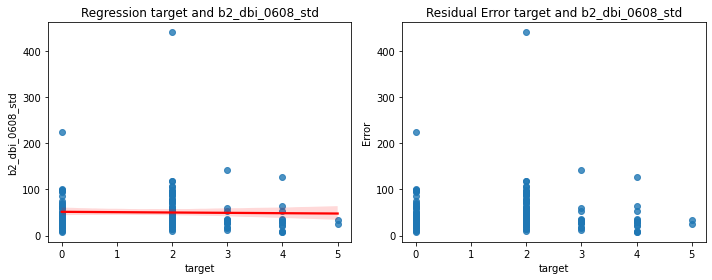

b3_dbi_0608_min
slope:  -203.6295924898651
intersept:  1344.7138468103258
r2:  -0.5722686695697657
P_value:  6.528647186045813e-16
std error:  22.716836987021512


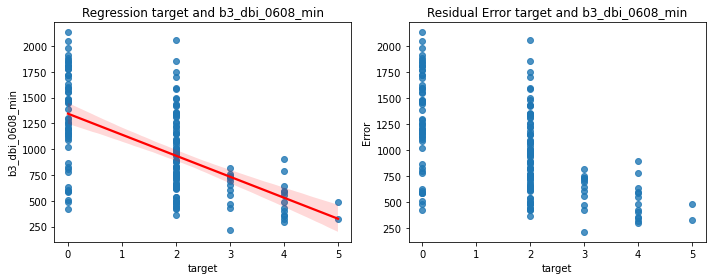

b3_dbi_0608_max
slope:  -189.3314273522505
intersept:  1611.08081928739
r2:  -0.4838715051160638
P_value:  3.486547927890074e-11
std error:  26.658011762808663


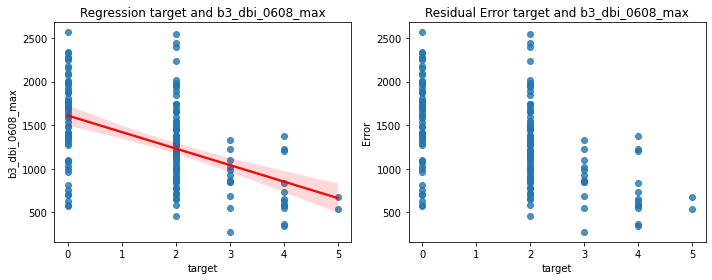

b3_dbi_0608_mean
slope:  -202.73605184552972
intersept:  1482.0606598037118
r2:  -0.552504641130575
P_value:  9.879647169820687e-15
std error:  23.810241662802515


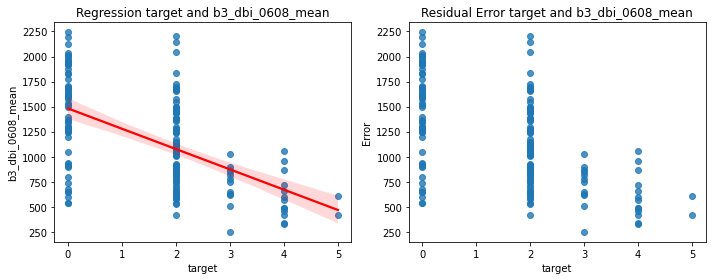

b3_dbi_0608_med
slope:  -205.99002560273044
intersept:  1483.7027949647954
r2:  -0.5583443878888803
P_value:  4.510413009808139e-15
std error:  23.827345464710547


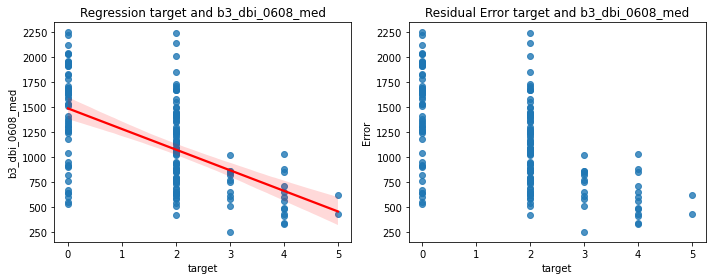

b3_dbi_0608_std
slope:  4.0735739404798315
intersept:  74.03016107098526
r2:  0.07638449213412418
P_value:  0.3265309280208767
std error:  4.139594110166888


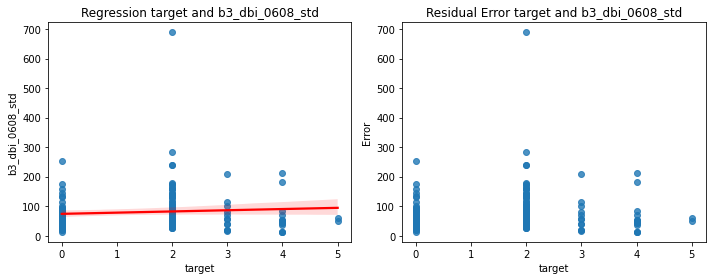

b4_dbi_0608_min
slope:  -120.04787710689112
intersept:  2329.6265841689774
r2:  -0.3673796388935198
P_value:  1.0405526042286858e-06
std error:  23.65993606299646


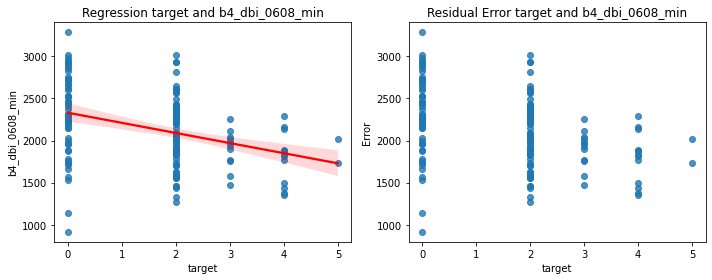

b4_dbi_0608_max
slope:  -87.79413270748861
intersept:  2656.542820567527
r2:  -0.27102722486281317
P_value:  0.00039608374236904485
std error:  24.27413056882583


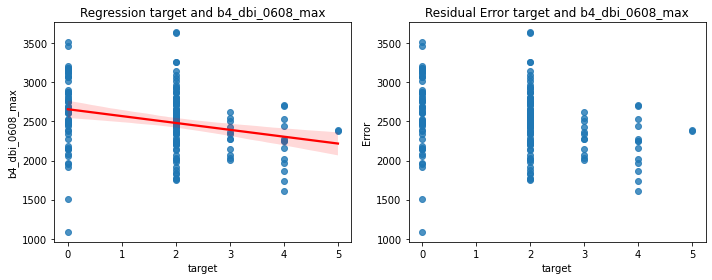

b4_dbi_0608_mean
slope:  -108.04131443353931
intersept:  2493.6232006614036
r2:  -0.33969945833296383
P_value:  7.0823399028442285e-06
std error:  23.28775108197239


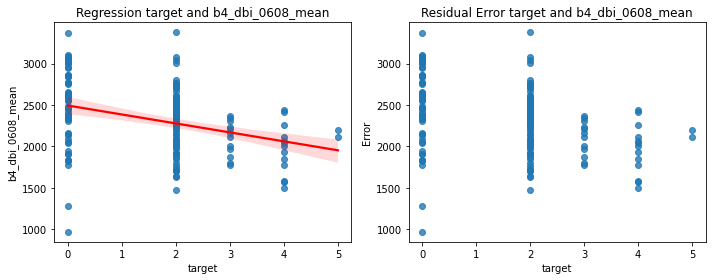

b4_dbi_0608_med
slope:  -110.05276296138221
intersept:  2491.1432899509277
r2:  -0.3425819590101287
P_value:  5.848906406334085e-06
std error:  23.495554677540937


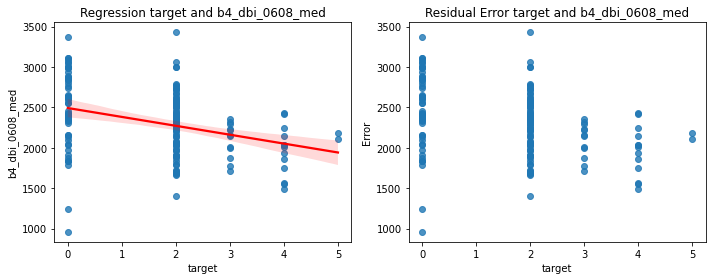

b4_dbi_0608_std
slope:  8.921943995647789
intersept:  90.73502688751313
r2:  0.1831518372784469
P_value:  0.01782939859674906
std error:  3.72818238846836


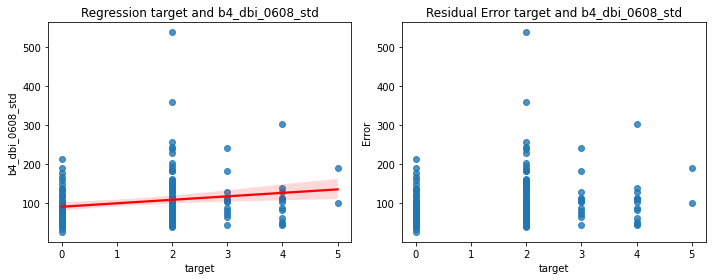

b5_dbi_0608_min
slope:  -301.0606144655424
intersept:  2919.467079155109
r2:  -0.5891513882557875
P_value:  5.526316902287505e-17
std error:  32.1446435264138


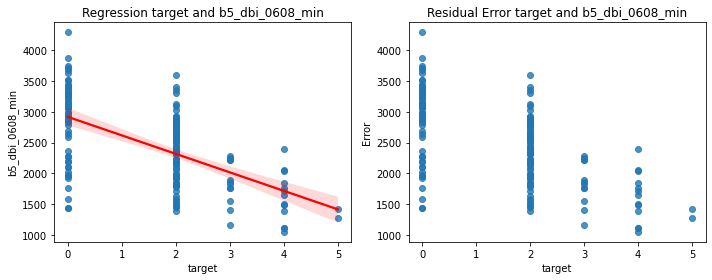

b5_dbi_0608_max
slope:  -257.1586942607206
intersept:  3341.9574567953905
r2:  -0.48754089888714575
P_value:  2.3557091438811765e-11
std error:  35.85190598949126


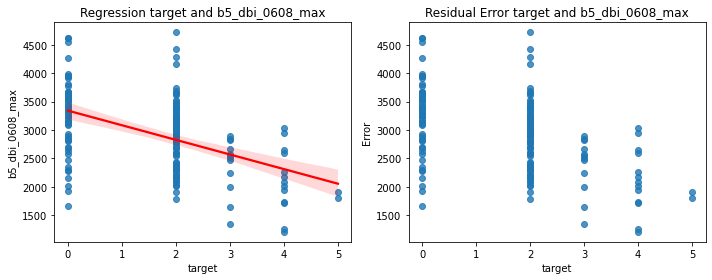

b5_dbi_0608_mean
slope:  -289.1031059312986
intersept:  3138.5553141668433
r2:  -0.5669142332182243
P_value:  1.3876245842345539e-15
std error:  32.70415955289668


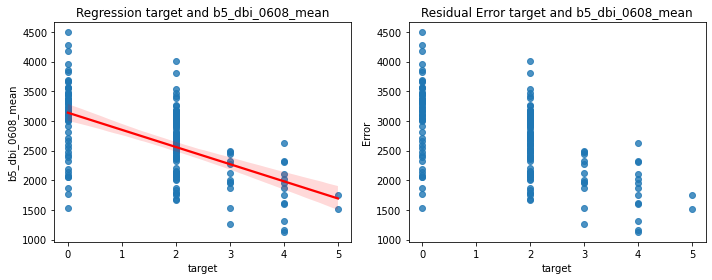

b5_dbi_0608_med
slope:  -293.0184446340936
intersept:  3139.505205888627
r2:  -0.5741887147896038
P_value:  4.965352197173008e-16
std error:  32.526348813755625


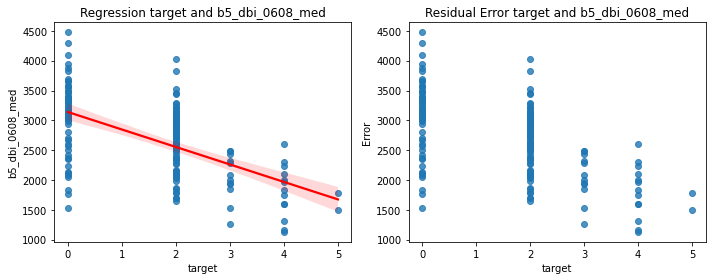

b5_dbi_0608_std
slope:  11.71293115856311
intersept:  118.66127268914205
r2:  0.15921594627194963
P_value:  0.03985984229019433
std error:  5.654073669631723


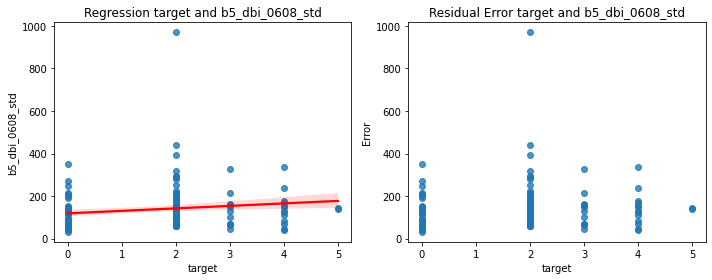

b6_dbi_0608_min
slope:  -267.88636654576436
intersept:  1960.1616812459988
r2:  -0.6077305099183644
P_value:  3.0747681892426554e-18
std error:  27.25188151372551


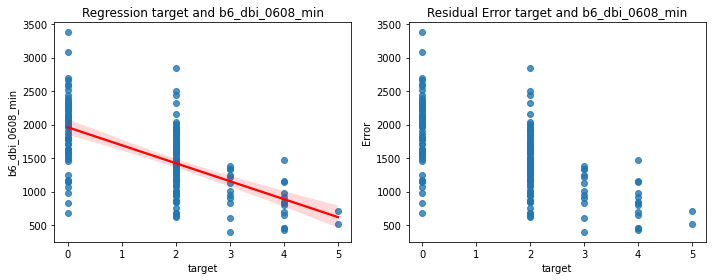

b6_dbi_0608_max
slope:  -234.18079795178105
intersept:  2352.303776402816
r2:  -0.4677730599590658
P_value:  1.8450848129905646e-10
std error:  34.44704608752116


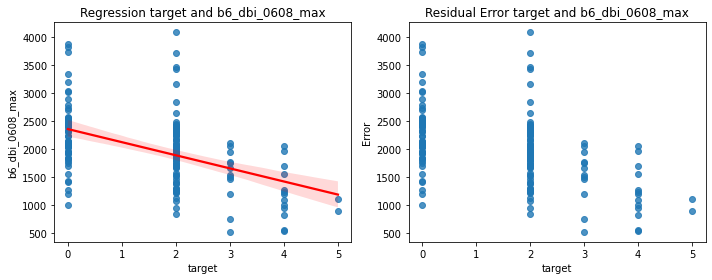

b6_dbi_0608_mean
slope:  -259.2454289524209
intersept:  2159.6027439726895
r2:  -0.5661067213790831
P_value:  1.5528992030813723e-15
std error:  29.388198340051172


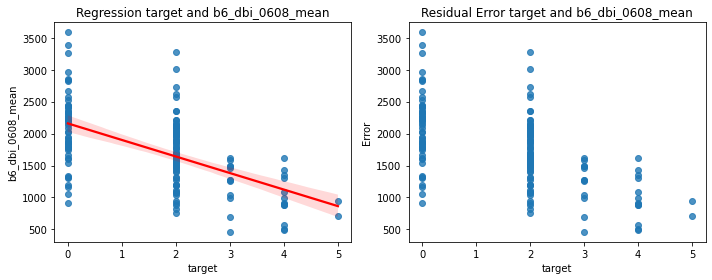

b6_dbi_0608_med
slope:  -263.5519308726259
intersept:  2161.4024535950493
r2:  -0.5748332466579072
P_value:  4.52764190815131e-16
std error:  29.206484643320767


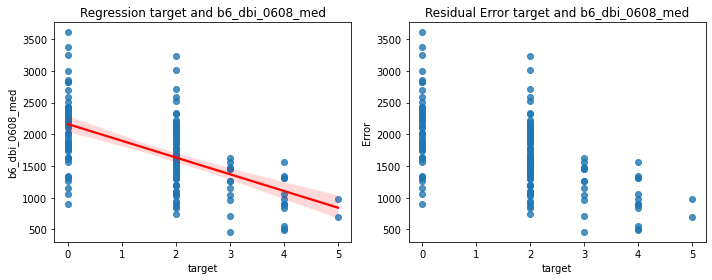

b6_dbi_0608_std
slope:  9.490330942988152
intersept:  106.54152160268094
r2:  0.12364457973510241
P_value:  0.11139511265854808
std error:  5.92951157965283


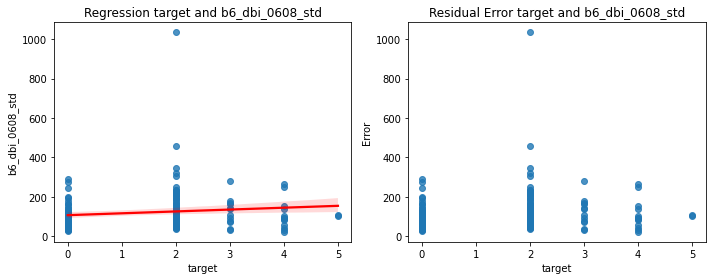

b1_dja_0305_min
slope:  4.249037997843047
intersept:  6.090520851904587
r2:  0.5282059339279019
P_value:  2.2021139231235696e-13
std error:  0.5317561788082659


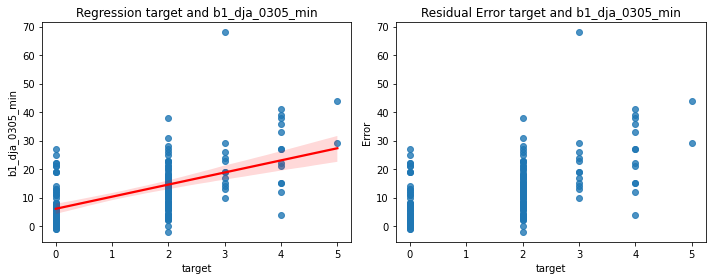

b1_dja_0305_max
slope:  5.9451917428269825
intersept:  11.681179946865587
r2:  0.6056627696514085
P_value:  4.280596521016659e-18
std error:  0.6080706971139165


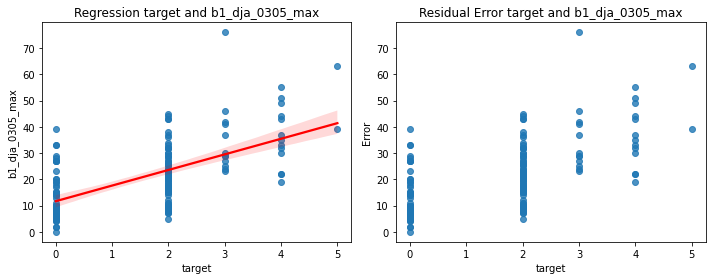

b1_dja_0305_mean
slope:  5.147933619951413
intersept:  8.95823164845348
r2:  0.5848425406424077
P_value:  1.052078092559063e-16
std error:  0.5558421720916918


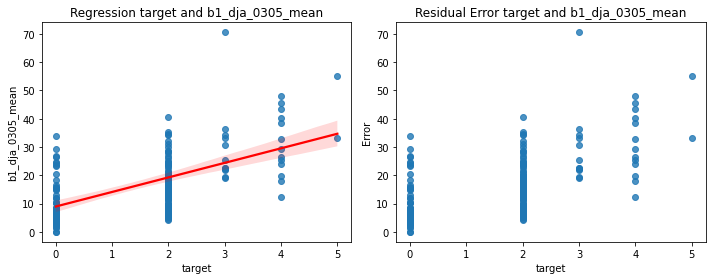

b1_dja_0305_med
slope:  5.127816373472521
intersept:  9.060411192719018
r2:  0.579770495705835
P_value:  2.2178601369328315e-16
std error:  0.5610152307493003


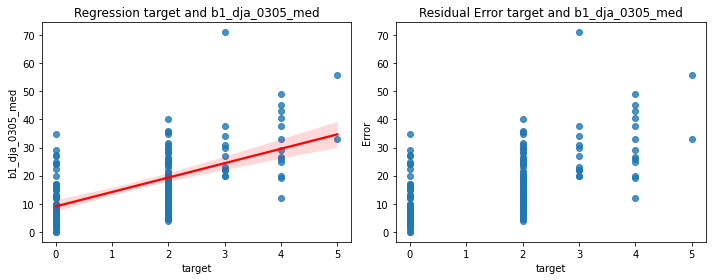

b1_dja_0305_std
slope:  0.4216183776471646
intersept:  1.584703631861305
r2:  0.36928884722448996
P_value:  9.054819956264903e-07
std error:  0.08259888019697698


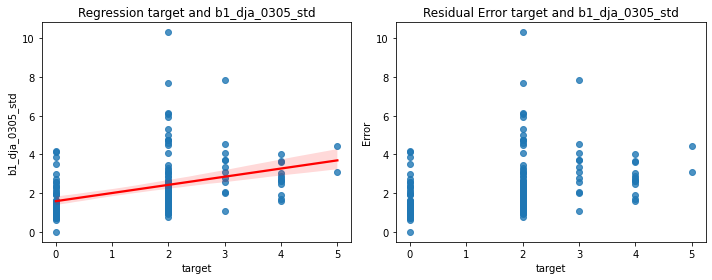

b1_dp1_0112_min
slope:  -3.0963345423511766
intersept:  18.406635815866323
r2:  -0.3075123748226451
P_value:  5.288798376249745e-05
std error:  0.7458855966361488


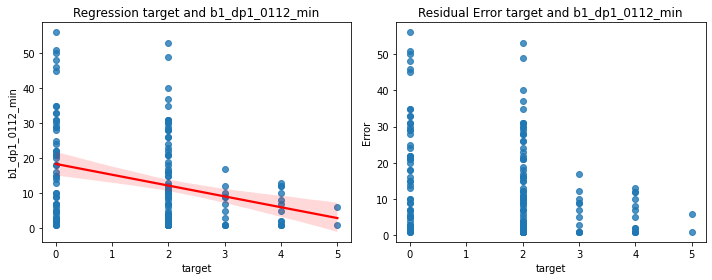

b1_dp1_0112_max
slope:  -3.751525496052906
intersept:  28.53348734209809
r2:  -0.304772143500955
P_value:  6.21128159461374e-05
std error:  0.9126864046744041


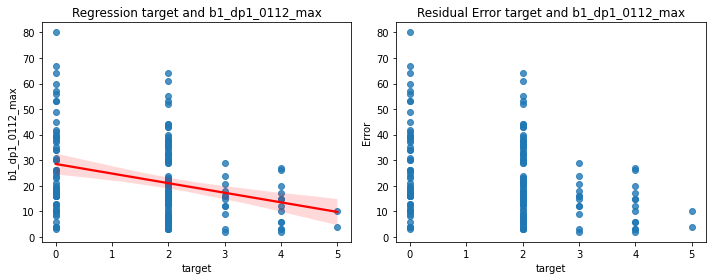

b1_dp1_0112_mean
slope:  -3.4721855071948347
intersept:  23.282517325986024
r2:  -0.3111078788190273
P_value:  4.272556300874929e-05
std error:  0.8257427335355424


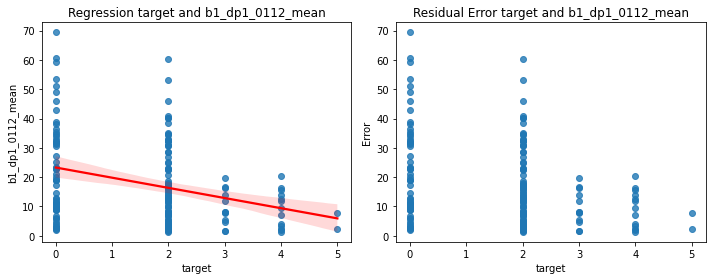

b1_dp1_0112_std
slope:  -0.16165254449969277
intersept:  2.9796262342155524
r2:  -0.10186824492592408
P_value:  0.1902125281245858
std error:  0.12289567765767523


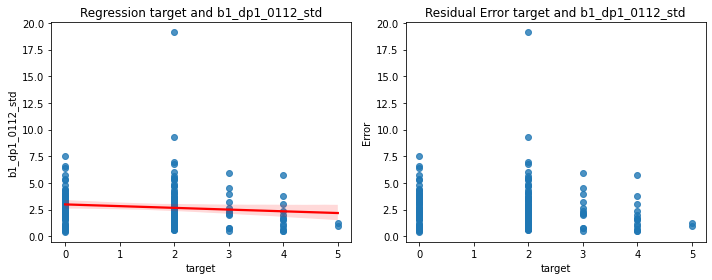

b1_dp1_0112_med
slope:  -3.4909537017281753
intersept:  23.141181404177352
r2:  -0.31009622469758225
P_value:  4.538192839520536e-05
std error:  0.8332042881239963


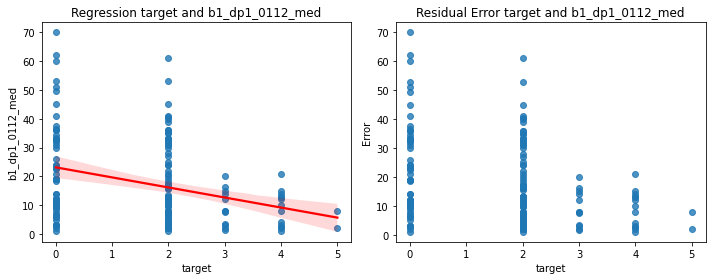

b2_dp1_0112_min
slope:  5.182080714250533
intersept:  12.656701514828269
r2:  0.43766810165778136
P_value:  3.3286561855376387e-09
std error:  0.8287871024339061


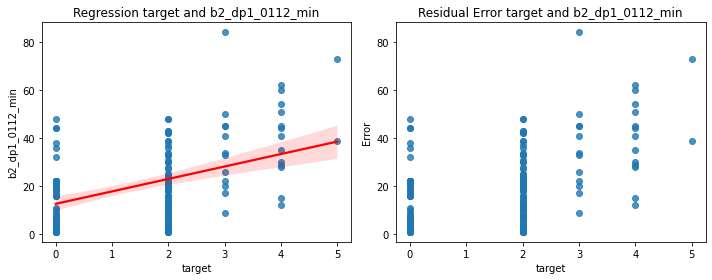

b2_dp1_0112_max
slope:  8.092370386174503
intersept:  15.227382267901714
r2:  0.5595423733457408
P_value:  3.832956158126109e-15
std error:  0.9331499909091756


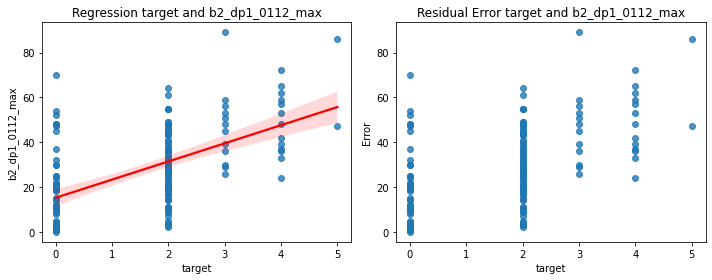

b2_dp1_0112_mean
slope:  7.757512534670347
intersept:  10.574199160554164
r2:  0.5643955107508593
P_value:  1.9691042720625806e-15
std error:  0.8833166508758894


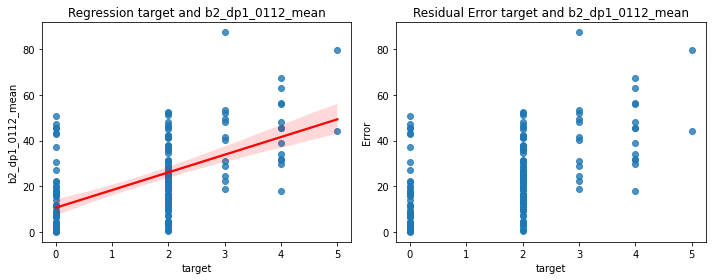

b2_dp1_0112_std
slope:  0.2682916291607111
intersept:  2.619248631976503
r2:  0.143675918237188
P_value:  0.06397141018626894
std error:  0.14386386912024302


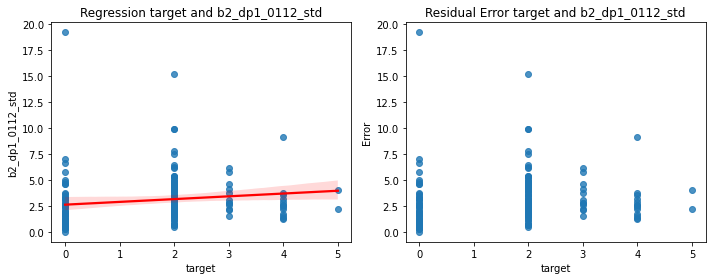

b2_dp1_0112_med
slope:  7.785639001493479
intersept:  10.610788313971904
r2:  0.5589025709485231
P_value:  4.181366089609753e-15
std error:  0.8992758554028326


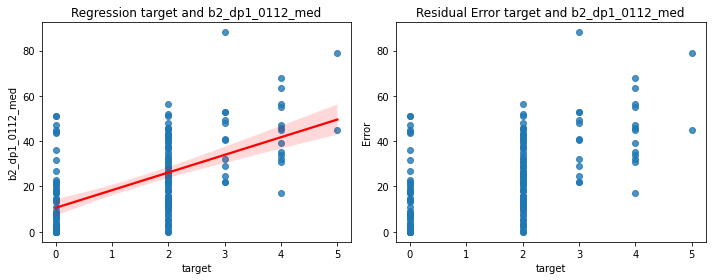

b3_dp1_0112_min
slope:  -3.987000213356081
intersept:  57.79893354778355
r2:  -0.329349961352127
P_value:  1.3861047310782355e-05
std error:  0.88984488954611


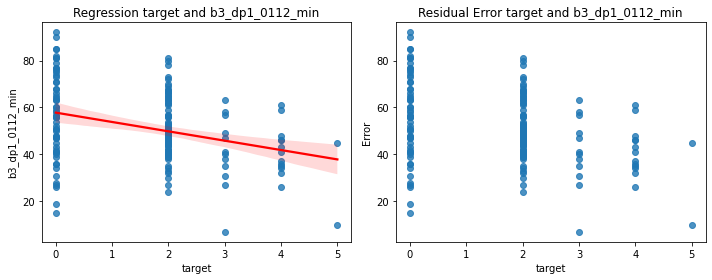

b3_dp1_0112_max
slope:  -4.3946490292297735
intersept:  70.82205925413652
r2:  -0.3571256644754082
P_value:  2.1627356446345308e-06
std error:  0.8948170261422935


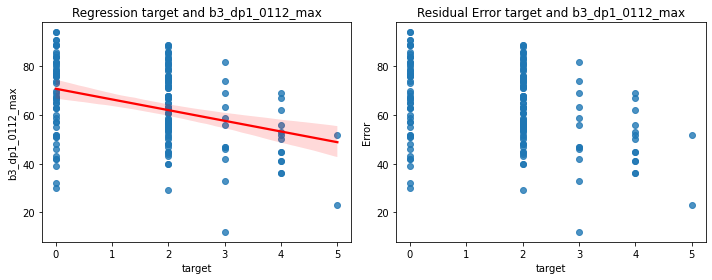

b3_dp1_0112_mean
slope:  -4.300020624422151
intersept:  64.65974192087513
r2:  -0.35310812572631556
P_value:  2.860970905903871e-06
std error:  0.8869577929452218


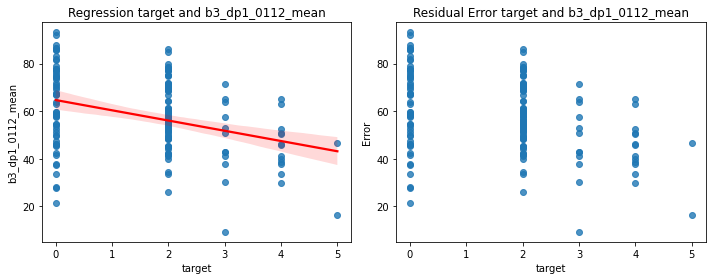

b3_dp1_0112_med
slope:  -4.323452101557488
intersept:  64.71467051198104
r2:  -0.34781798624306665
P_value:  4.111434398051284e-06
std error:  0.9072702618415793


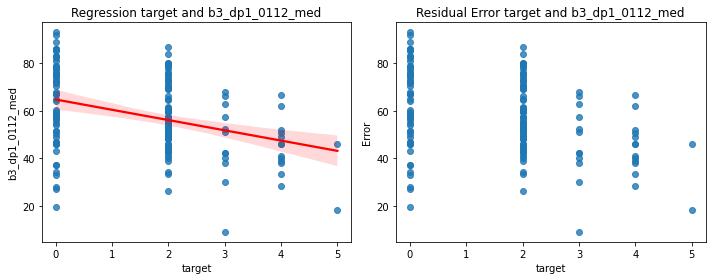

b3_dp1_0112_std
slope:  -0.13897301552279911
intersept:  3.961068819521158
r2:  -0.07787498472939
P_value:  0.3171518522623766
std error:  0.13850633349994126


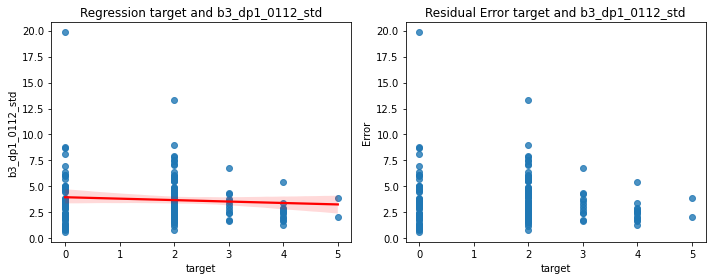

b1_dp1_0509_min
slope:  -2.8719820780883247
intersept:  17.654710191309288
r2:  -0.29482765224658736
P_value:  0.00010985561808020187
std error:  0.724644764707145


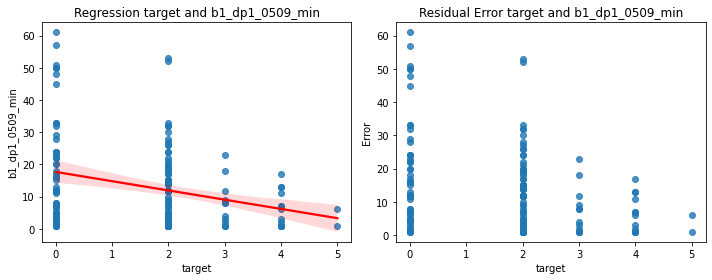

b1_dp1_0509_max
slope:  -3.3508000853424282
intersept:  26.958638946178937
r2:  -0.2818289721249749
P_value:  0.00022446896442645668
std error:  0.8880755044892583


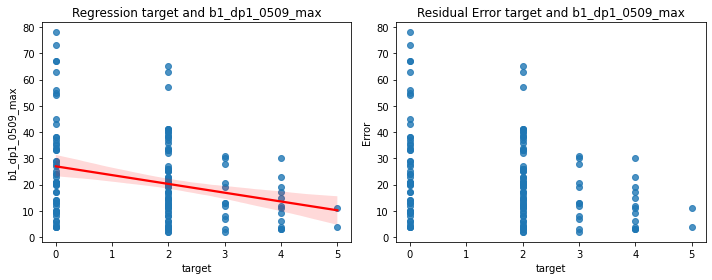

b1_dp1_0509_mean
slope:  -3.174325883649805
intersept:  22.23769754535133
r2:  -0.29639866885671484
P_value:  0.00010053002681482587
std error:  0.7962801761198847


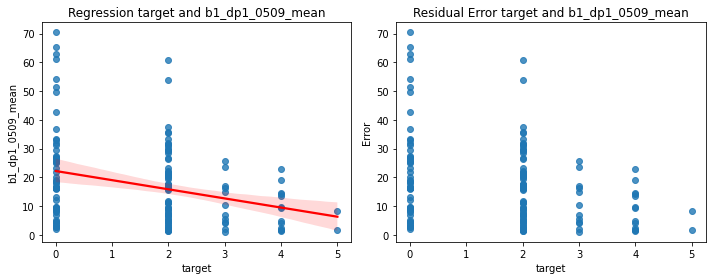

b1_dp1_0509_std
slope:  -0.15185047097567517
intersept:  2.8210038328322704
r2:  -0.09286614179889904
P_value:  0.2326099965080682
std error:  0.1267464903669708


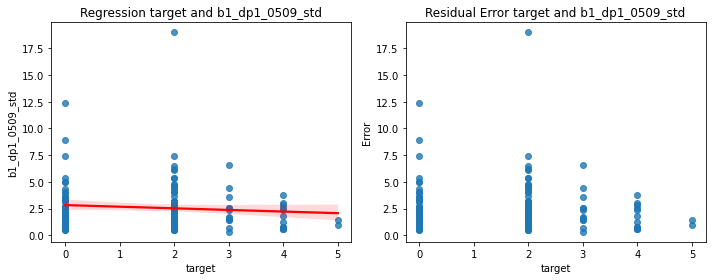

b1_dp1_0509_med
slope:  -3.2516279069767395
intersept:  22.27715762273901
r2:  -0.2989981395106425
P_value:  8.670806833207685e-05
std error:  0.8078937231983582


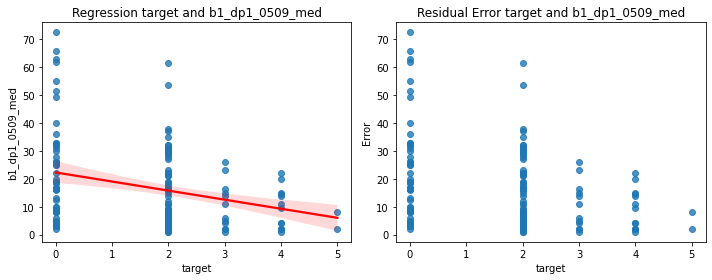

b2_dp1_0509_min
slope:  3.9964573448306395
intersept:  14.208716257167733
r2:  0.3918241271394607
P_value:  1.637731650825989e-07
std error:  0.730548088912706


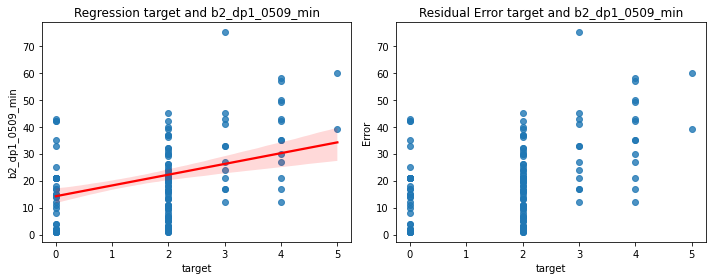

b2_dp1_0509_max
slope:  7.972182632814146
intersept:  12.84450702889793
r2:  0.5678726386090842
P_value:  1.2136556821535008e-15
std error:  0.8995920251471


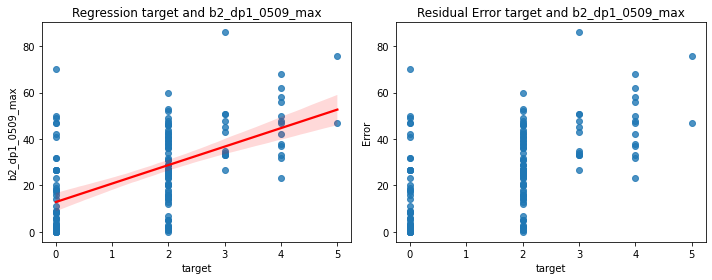

b2_dp1_0509_mean
slope:  7.239518822748486
intersept:  9.51456040962616
r2:  0.5677829723191543
P_value:  1.2289843122997395e-15
std error:  0.8171076440617497


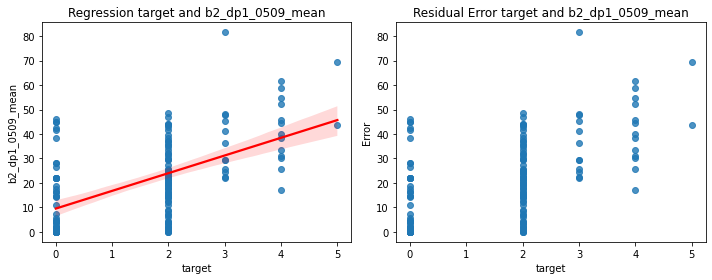

b2_dp1_0509_std
slope:  0.42538138287301797
intersept:  2.0924533177416746
r2:  0.21067807493401777
P_value:  0.006278815554217772
std error:  0.15365920689927046


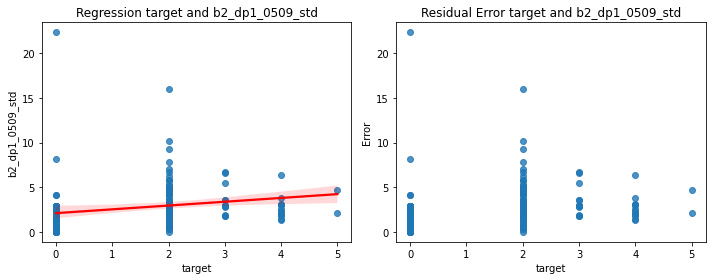

b2_dp1_0509_med
slope:  7.294273522509054
intersept:  9.416992311278655
r2:  0.5648534729842589
P_value:  1.848110823355764e-15
std error:  0.8295811379241159


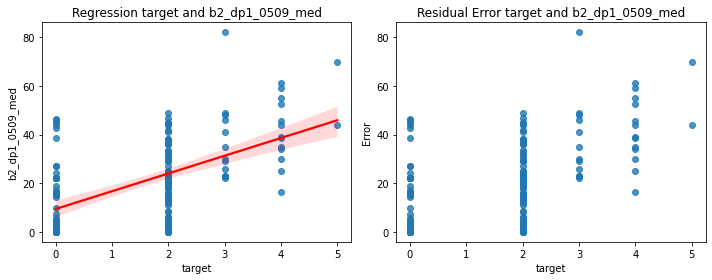

b3_dp1_0509_min
slope:  -4.185831833861681
intersept:  60.8608306537948
r2:  -0.31822469289868915
P_value:  2.777840034106356e-05
std error:  0.9707810351181168


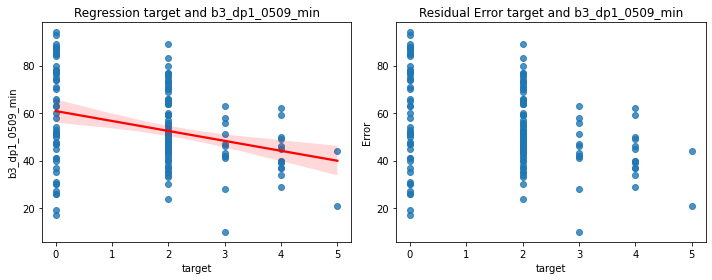

b3_dp1_0509_max
slope:  -3.8448645188820056
intersept:  72.30733960758283
r2:  -0.31300144113460754
P_value:  3.814179021957236e-05
std error:  0.908245482382604


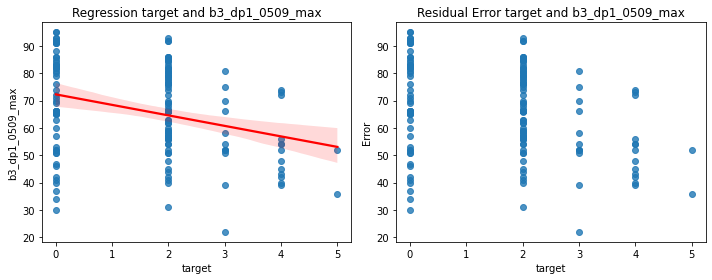

b3_dp1_0509_mean
slope:  -4.0630182182395655
intersept:  66.76210713724413
r2:  -0.3222719307416021
P_value:  2.1639352948071323e-05
std error:  0.9291213560504181


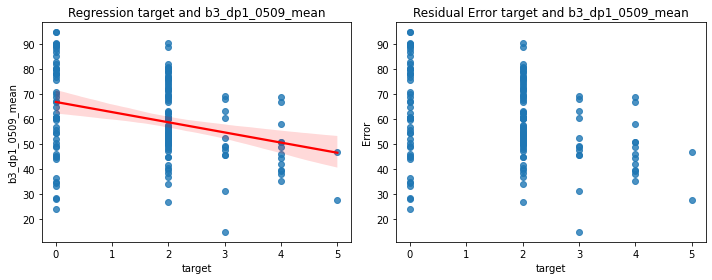

b3_dp1_0509_med
slope:  -4.053339022829092
intersept:  66.61913962180657
r2:  -0.3177723369628351
P_value:  2.8558383923611845e-05
std error:  0.9415420607991365


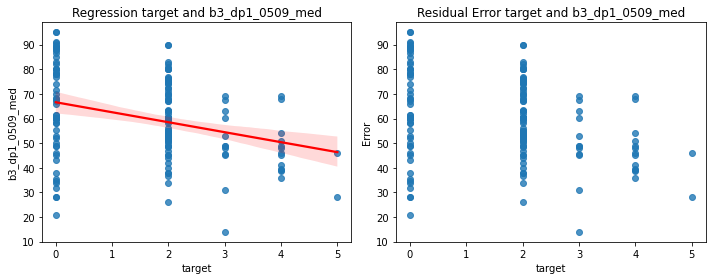

b3_dp1_0509_std
slope:  0.08996142174906334
intersept:  3.4152994037357427
r2:  0.04734547486074933
P_value:  0.5434635718614285
std error:  0.14775716822142684


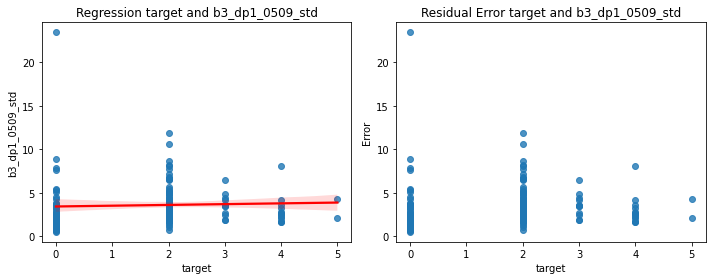

b1_dim_0305_min
slope:  -3.1593567974684196
intersept:  15.22727634900524
r2:  -0.34626474997814694
P_value:  4.56763908884662e-06
std error:  0.6663687306010184


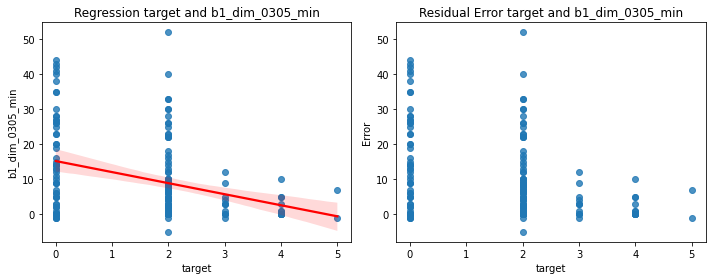

b1_dim_0305_max
slope:  -3.6633952065998057
intersept:  26.73175449825758
r2:  -0.29890838292920074
P_value:  8.71540749359385e-05
std error:  0.9105008438614586


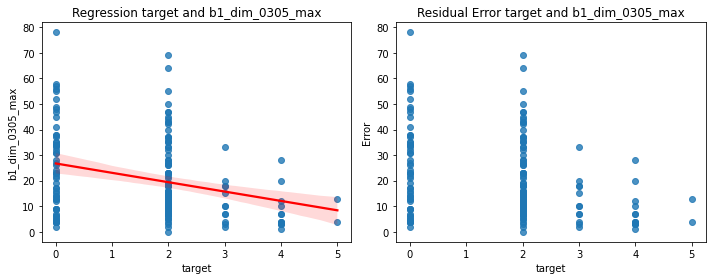

b1_dim_0305_mean
slope:  -3.5488798935025665
intersept:  21.010338069397264
r2:  -0.33853448618977966
P_value:  7.647658648859255e-06
std error:  0.7679179137739764


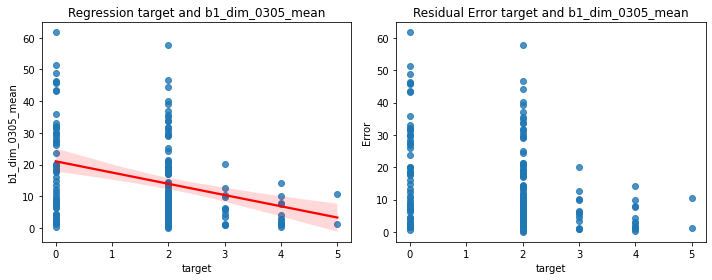

b1_dim_0305_med
slope:  -3.625851251293958
intersept:  21.087218389714646
r2:  -0.3403228835459523
P_value:  6.796316113428024e-06
std error:  0.7799150208030465


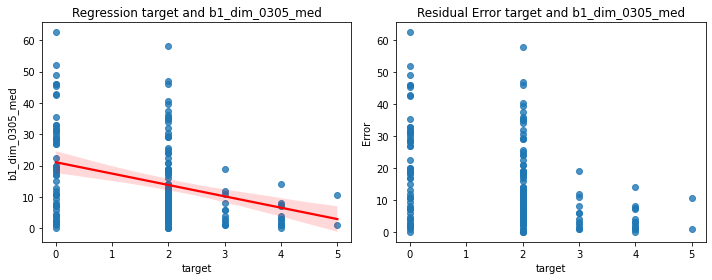

b1_dim_0305_std
slope:  -0.1025106549009795
intersept:  3.128179460551996
r2:  -0.0533808625862574
P_value:  0.4932554563636865
std error:  0.1492869346824933


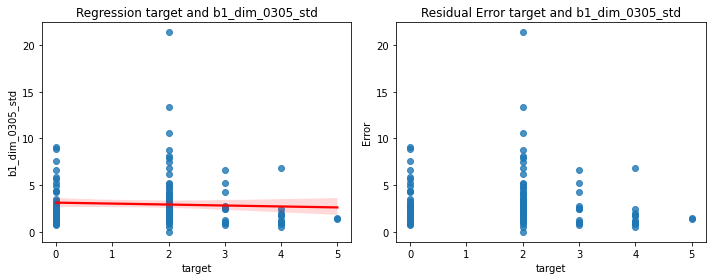

b2_dim_0305_min
slope:  5.253388491232567
intersept:  21.986800621564843
r2:  0.38975032992011766
P_value:  1.9272190567391508e-07
std error:  0.9663472704643588


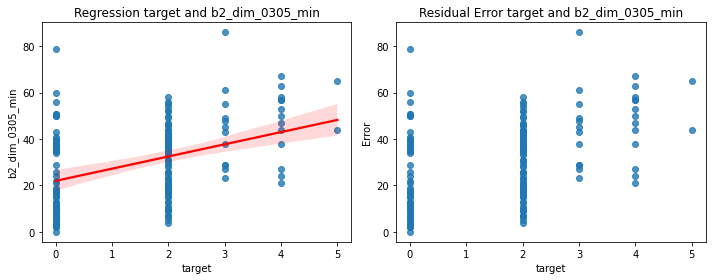

b2_dim_0305_max
slope:  6.275562035259056
intersept:  32.54065065705775
r2:  0.4461881953997831
P_value:  1.5102479125622794e-09
std error:  0.9799097732287734


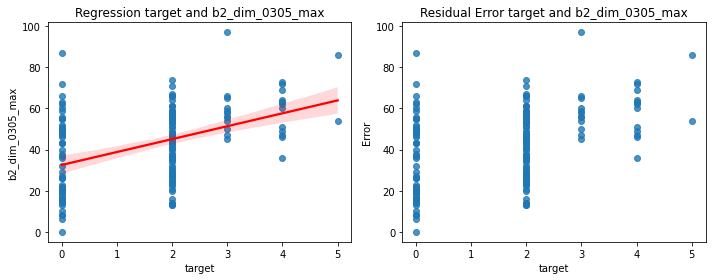

b2_dim_0305_mean
slope:  5.837313058783338
intersept:  27.12698060101561
r2:  0.4272140008743162
P_value:  8.524228428103939e-09
std error:  0.9617590502477488


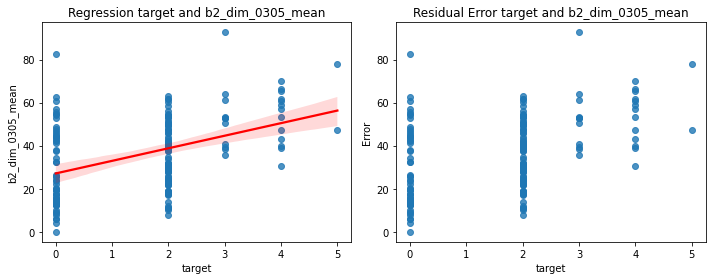

b2_dim_0305_med
slope:  5.971778125469172
intersept:  26.938604018996614
r2:  0.43019629219670663
P_value:  6.539758824839165e-09
std error:  0.9755633760559814


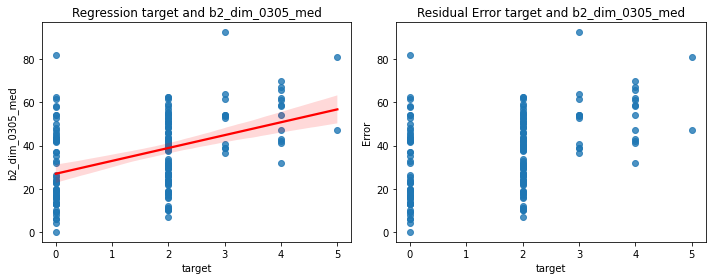

b2_dim_0305_std
slope:  0.28475636416351374
intersept:  2.963014215476615
r2:  0.16598402617019506
P_value:  0.03205140239230233
std error:  0.13170390652185635


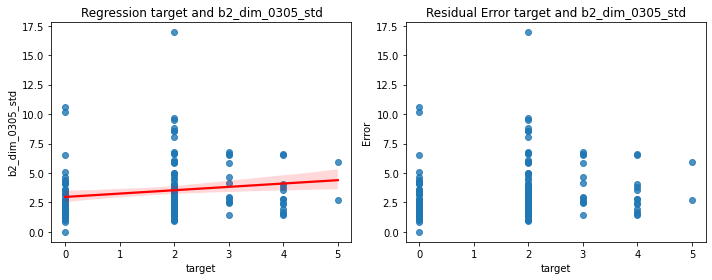

b3_dim_0305_min
slope:  -1.8850771574926657
intersept:  44.321955474660655
r2:  -0.22801417500340537
P_value:  0.003040620082763852
std error:  0.6266595536226658


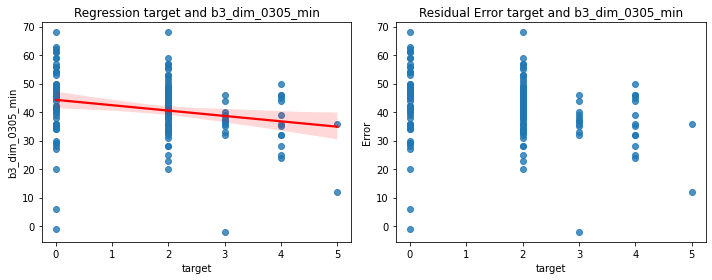

b3_dim_0305_max
slope:  -2.7197006693059547
intersept:  57.30929837454266
r2:  -0.32259077844699324
P_value:  2.121452022290809e-05
std error:  0.6212486884352754


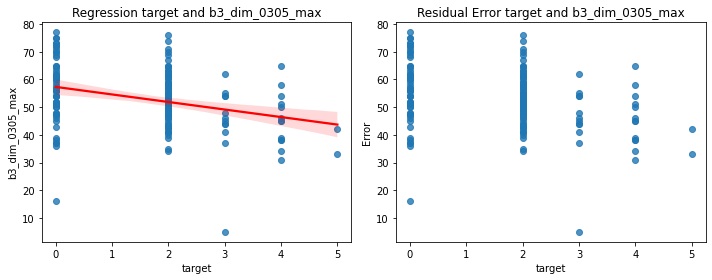

b3_dim_0305_mean
slope:  -2.30388594931607
intersept:  50.57651074646615
r2:  -0.28851046433433286
P_value:  0.00015613862959664975
std error:  0.5952311731280754


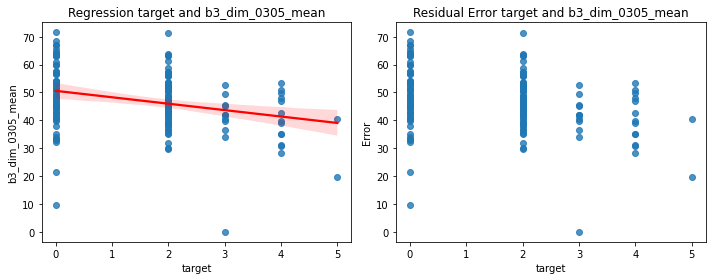

b3_dim_0305_med
slope:  -2.335708697816651
intersept:  50.47042173387383
r2:  -0.2893589745059504
P_value:  0.0001490075546607101
std error:  0.6015224087527695


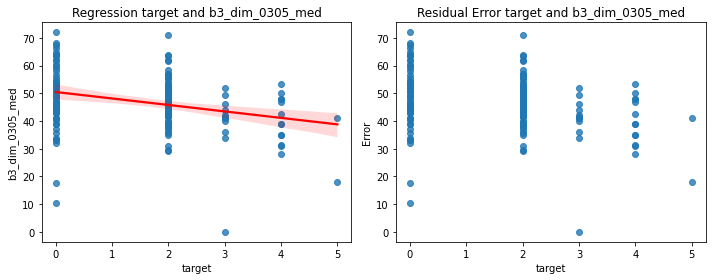

b3_dim_0305_std
slope:  -0.20282840592195045
intersept:  3.4402866524557534
r2:  -0.16810812326957938
P_value:  0.029886043244866257
std error:  0.09259191564476113


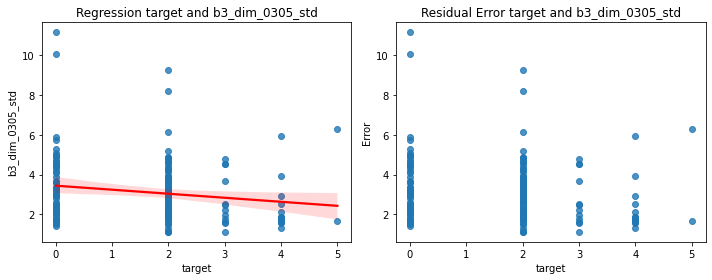

b1_dim_0608_min
slope:  -3.4210176519123605
intersept:  20.12038570249852
r2:  -0.342110975569663
P_value:  6.035449832725661e-06
std error:  0.7315042776600473


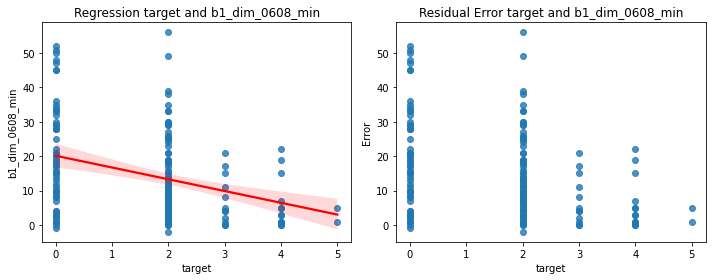

b1_dim_0608_max
slope:  -3.282257465487669
intersept:  32.285946155244204
r2:  -0.2668151664397159
P_value:  0.0004911826457071499
std error:  0.9229613689844517


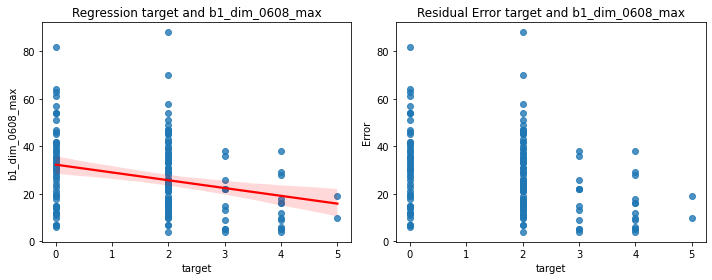

b1_dim_0608_mean
slope:  -3.5333567629929834
intersept:  26.151847861302727
r2:  -0.33117251460583896
P_value:  1.2336772551113485e-05
std error:  0.7837281743732949


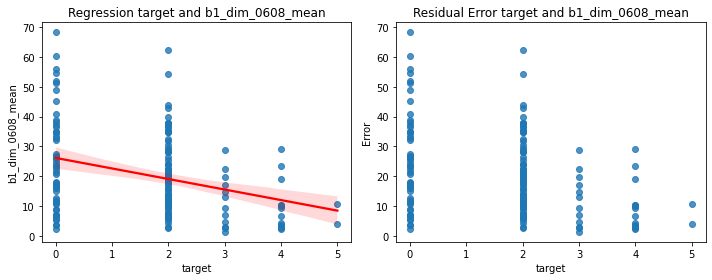

b1_dim_0608_med
slope:  -3.5784008565851892
intersept:  26.173883634007368
r2:  -0.33256693870278126
P_value:  1.1279085846683183e-05
std error:  0.789980405254301


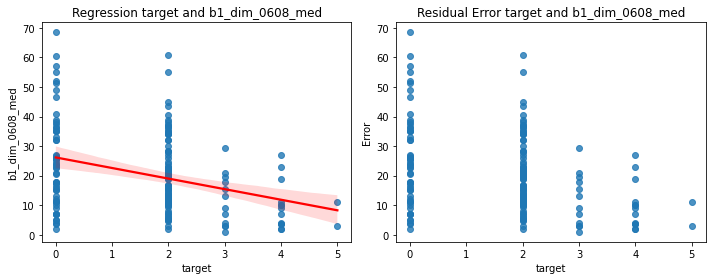

b1_dim_0608_std
slope:  0.016623656703883164
intersept:  3.3781552662161025
r2:  0.007544585568061229
P_value:  0.9229117409428466
std error:  0.17152871751578924


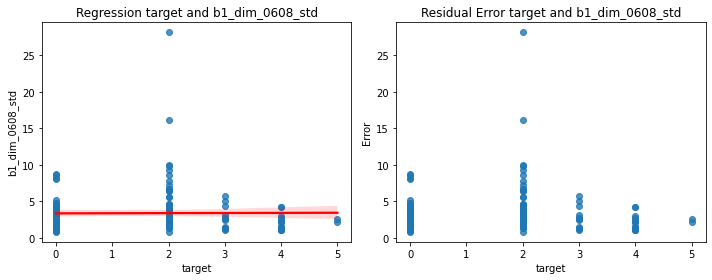

b2_dim_0608_min
slope:  5.1071209955610515
intersept:  9.603008132076877
r2:  0.5004868706961622
P_value:  5.6879984720000146e-12
std error:  0.6877506976814709


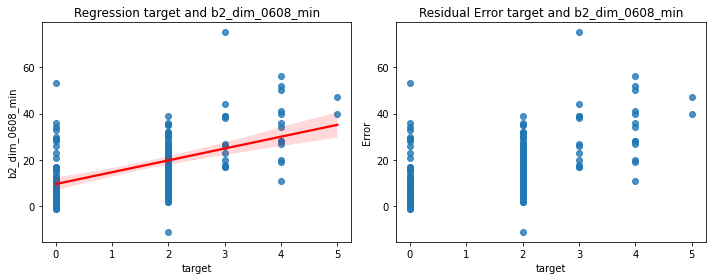

b2_dim_0608_max
slope:  6.691276896696127
intersept:  17.278815320547793
r2:  0.5542711937331651
P_value:  7.806039182788428e-15
std error:  0.7822462176335715


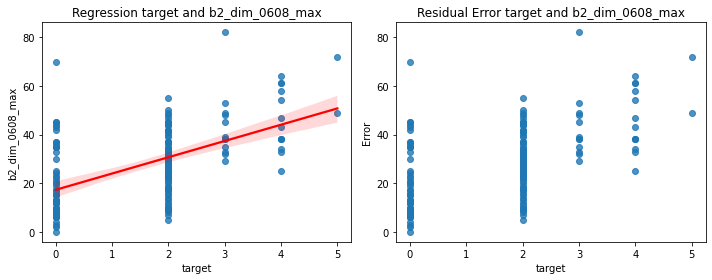

b2_dim_0608_mean
slope:  6.0379387430955465
intersept:  13.305779804660668
r2:  0.5530498948862063
P_value:  9.188129611675626e-15
std error:  0.7081163833550183


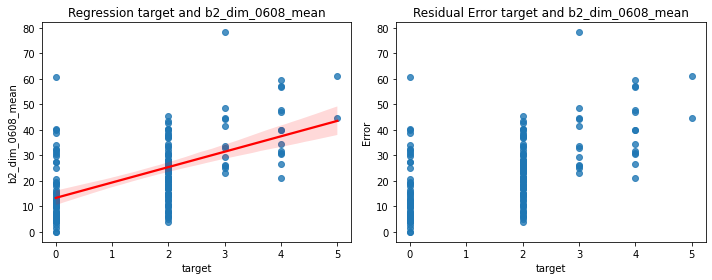

b2_dim_0608_med
slope:  6.101379702723833
intersept:  13.260493563757931
r2:  0.5562503144719121
P_value:  5.985357501085062e-15
std error:  0.7096179075452794


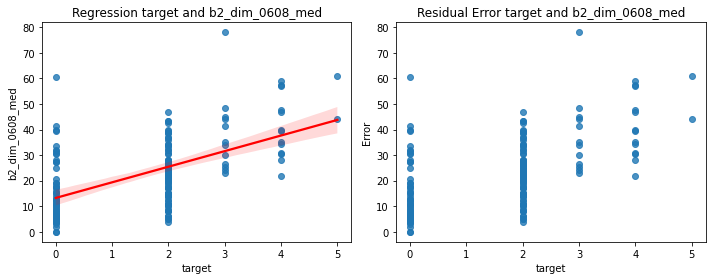

b2_dim_0608_std
slope:  0.39337499240028395
intersept:  2.196173580317094
r2:  0.24286874161549066
P_value:  0.0015643703324966934
std error:  0.1223182823478828


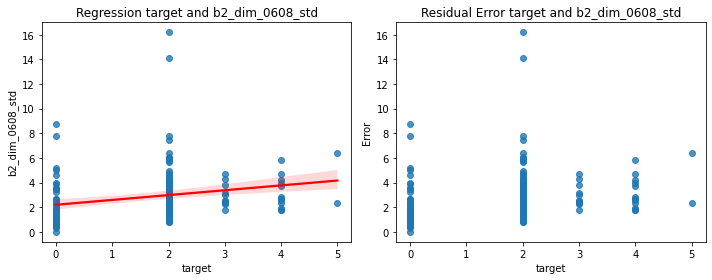

b3_dim_0608_min
slope:  -2.4330397956312937
intersept:  53.276903353466835
r2:  -0.24891249920117986
P_value:  0.00117985322874586
std error:  0.737007332020008


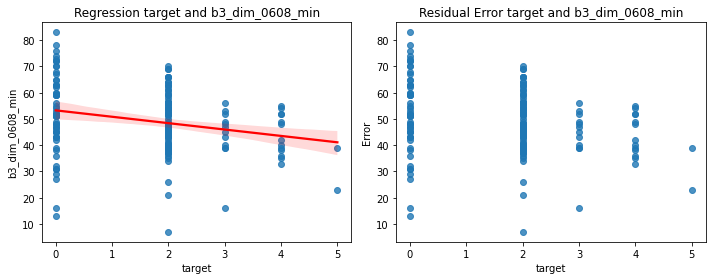

b3_dim_0608_max
slope:  -2.735846193964388
intersept:  65.35580210037217
r2:  -0.28770504884183756
P_value:  0.00016320080526148072
std error:  0.7089904006471763


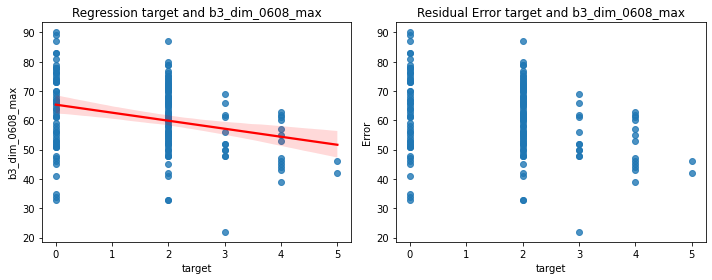

b3_dim_0608_mean
slope:  -2.5308347201479213
intersept:  59.262901393926455
r2:  -0.2727946147338032
P_value:  0.0003615110497668604
std error:  0.6948542639047677


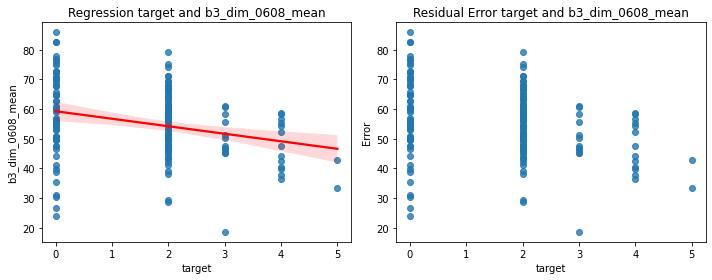

b3_dim_0608_med
slope:  -2.5543180902259115
intersept:  59.25379892373703
r2:  -0.2727792027650841
P_value:  0.00036180005072210594
std error:  0.7013445583033954


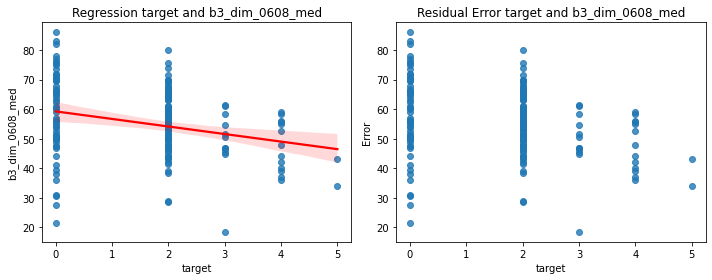

b3_dim_0608_std
slope:  -0.07479048700024933
intersept:  3.288702992021497
r2:  -0.05142661886634941
P_value:  0.5092386180464881
std error:  0.1130684315480247


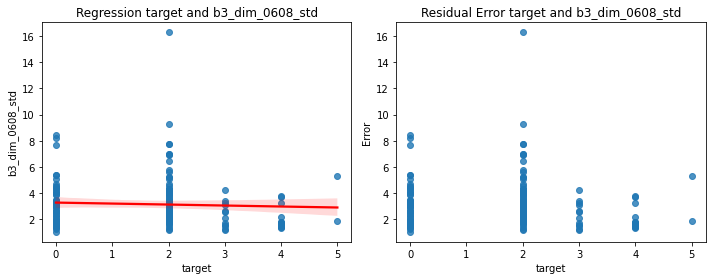

b1_dim_0911_min
slope:  -4.090206955408566
intersept:  23.9809259654363
r2:  -0.37875940737708125
P_value:  4.482941509603842e-07
std error:  0.7780617030194622


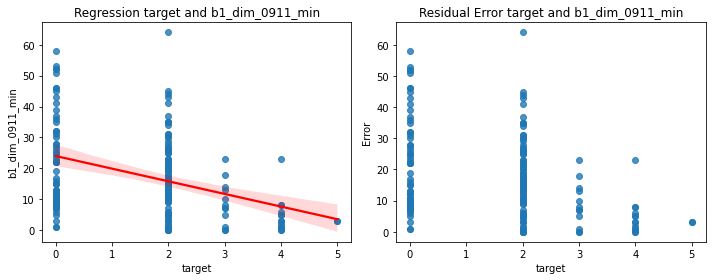

b1_dim_0911_max
slope:  -3.93614252186899
intersept:  35.31222530403242
r2:  -0.30965141839109744
P_value:  4.659833688978378e-05
std error:  0.9409528167742144


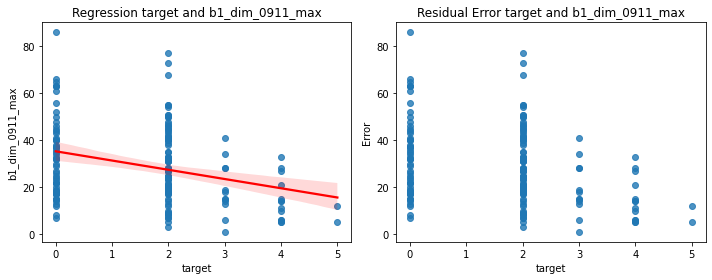

b1_dim_0911_mean
slope:  -4.101924127219533
intersept:  29.629721422675015
r2:  -0.3586815103973533
P_value:  1.9386499221082538e-06
std error:  0.8310599896163211


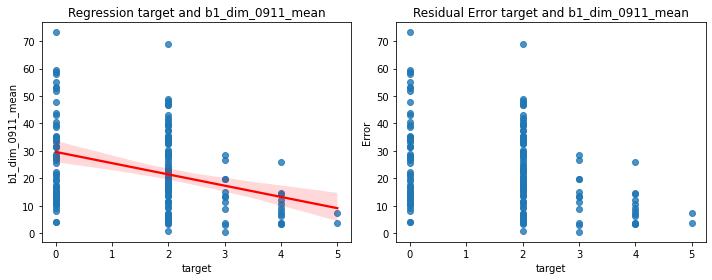

b1_dim_0911_med
slope:  -4.164465542991245
intersept:  29.679155109878373
r2:  -0.3600389753013403
P_value:  1.7613558886261035e-06
std error:  0.8400791841170338


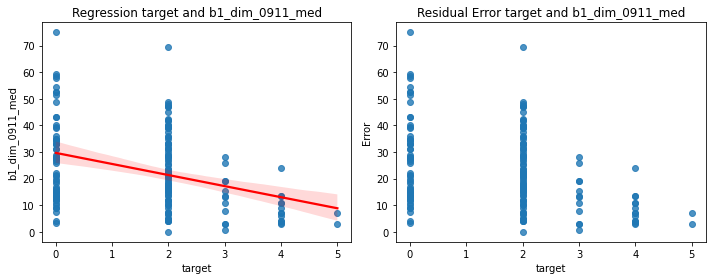

b1_dim_0911_std
slope:  0.04996292130093972
intersept:  3.055514863120213
r2:  0.02632371519489632
P_value:  0.7356037075007467
std error:  0.14770940412727523


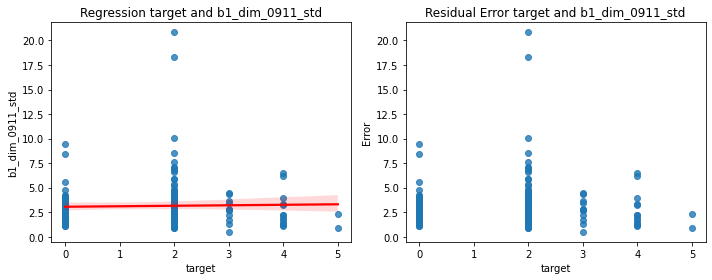

b2_dim_0911_min
slope:  5.059654363132055
intersept:  8.887732024749326
r2:  0.5333601929936993
P_value:  1.163717514444791e-13
std error:  0.6246996504848034


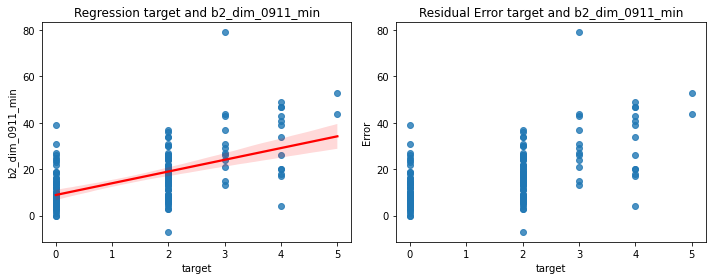

b2_dim_0911_max
slope:  6.1835929165777515
intersept:  15.37443994026032
r2:  0.5556098029124906
P_value:  6.523817408070463e-15
std error:  0.7203799055543038


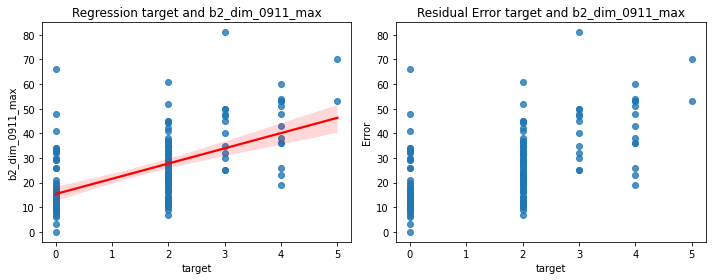

b2_dim_0911_mean
slope:  5.696578685496123
intersept:  11.976631521340831
r2:  0.5651181478745387
P_value:  1.781524305397629e-15
std error:  0.6474288979383569


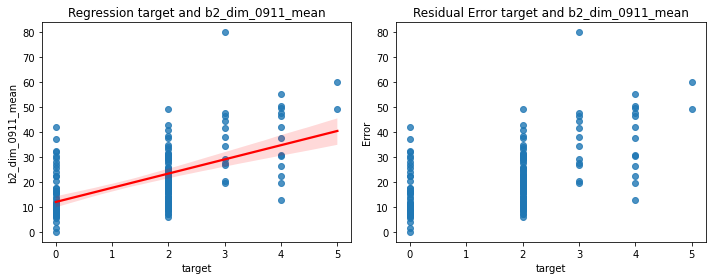

b2_dim_0911_med
slope:  5.74982931512693
intersept:  11.985299765308326
r2:  0.5625579790197136
P_value:  2.5371584050548163e-15
std error:  0.6578456570212874


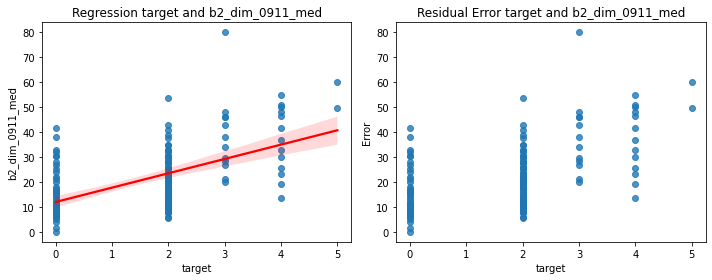

b2_dim_0911_std
slope:  0.26670622737561905
intersept:  1.884019523815951
r2:  0.17608833477189698
P_value:  0.022828796960653073
std error:  0.1160702432932611


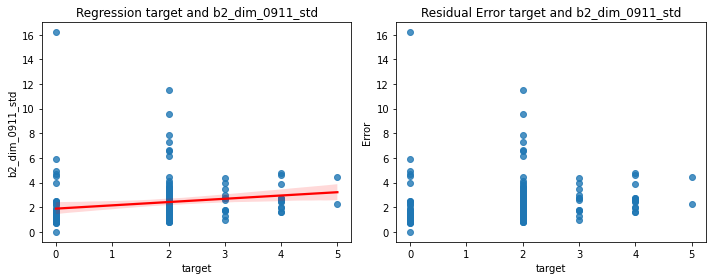

b3_dim_0911_min
slope:  -1.3629187113292063
intersept:  51.11862598677192
r2:  -0.13621444242700384
P_value:  0.07921695213984946
std error:  0.7716812475210457


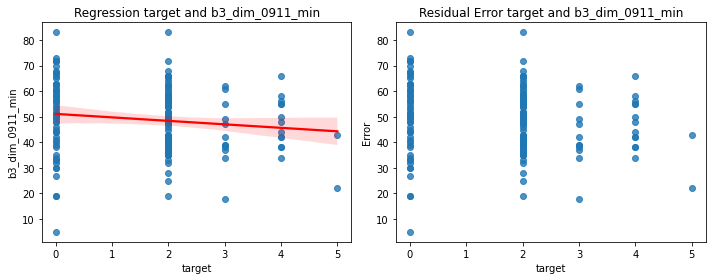

b3_dim_0911_max
slope:  -1.5222317047151663
intersept:  62.46029443140601
r2:  -0.16177812020889712
P_value:  0.03673377488534208
std error:  0.7228698299431965


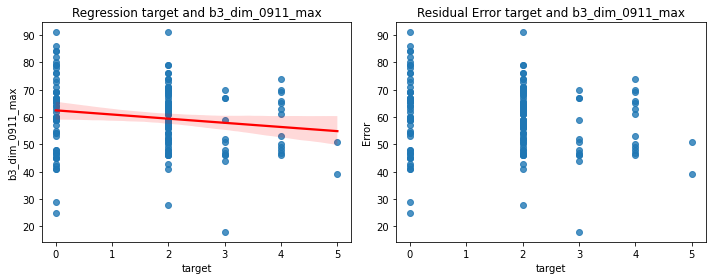

b3_dim_0911_mean
slope:  -1.5878734062717441
intersept:  57.05106539448521
r2:  -0.1679703516320169
P_value:  0.030022610498152306
std error:  0.725481900561131


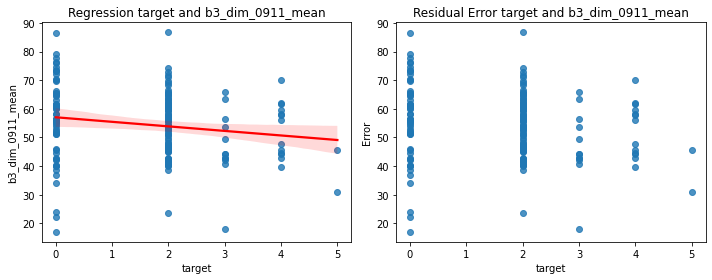

b3_dim_0911_med
slope:  -1.652613612118623
intersept:  57.043652656283335
r2:  -0.17206260983934785
P_value:  0.02618564486919185
std error:  0.7365750456791168


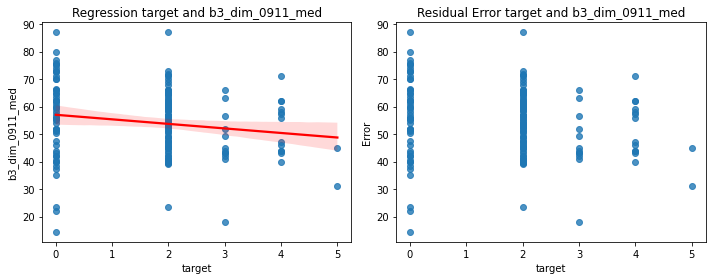

b3_dim_0911_std
slope:  -0.06531032881265643
intersept:  3.160129405270451
r2:  -0.046226378774620665
P_value:  0.5530427257489016
std error:  0.10987161568683688


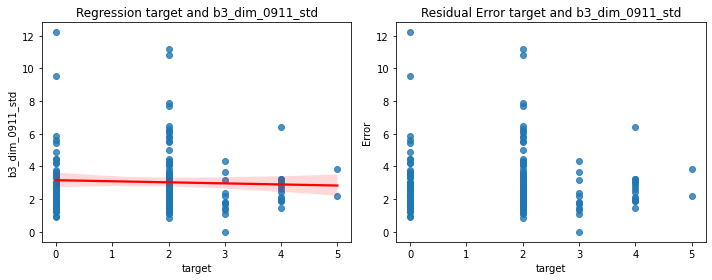

b1_dim_1202_min
slope:  -2.993046115395159
intersept:  16.630153311591318
r2:  -0.3160009088638889
P_value:  3.181583570531245e-05
std error:  0.699582539144212


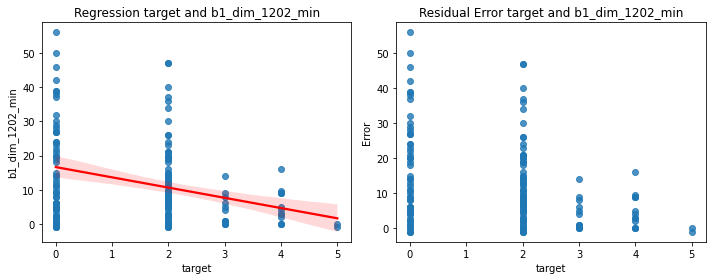

b1_dim_1202_max
slope:  -3.273802419521758
intersept:  27.92716214107613
r2:  -0.29304228321664344
P_value:  0.00012143289391163067
std error:  0.8315402713385143


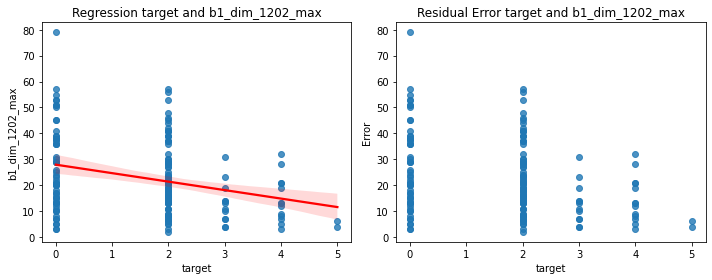

b1_dim_1202_mean
slope:  -3.221541950487747
intersept:  22.336553317569784
r2:  -0.31643625169212886
P_value:  3.098434214108184e-05
std error:  0.7518392862168574


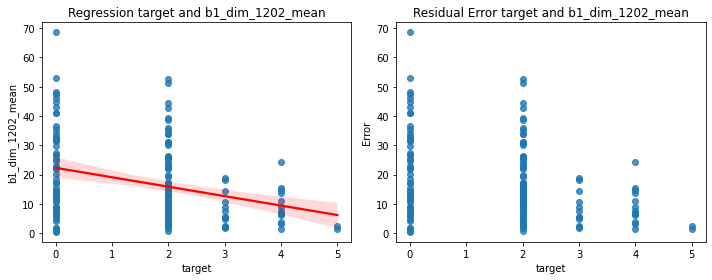

b1_dim_1202_med
slope:  -3.2481479417505965
intersept:  22.368463740609933
r2:  -0.31426504920523857
P_value:  3.53447537342e-05
std error:  0.7638663302526154


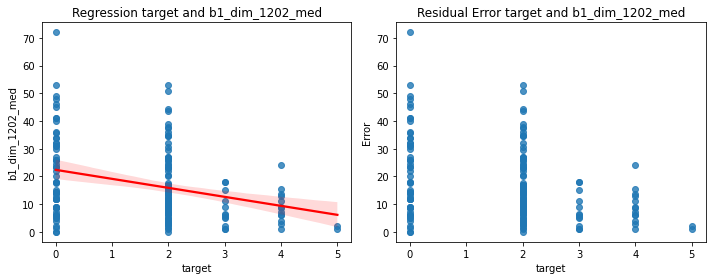

b1_dim_1202_std
slope:  -0.07358002313366899
intersept:  3.119747656532848
r2:  -0.053829197710367045
P_value:  0.48962657687881506
std error:  0.10626002788672607


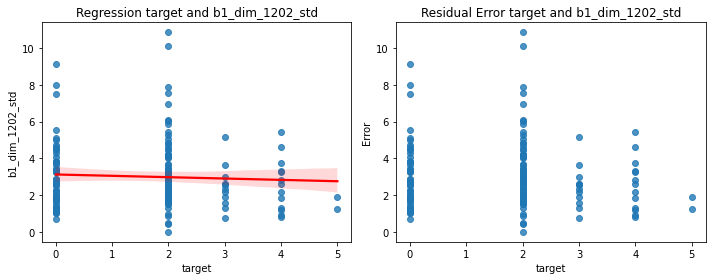

b2_dim_1202_min
slope:  3.9945056996555737
intersept:  25.597115882837038
r2:  0.28877282237963
P_value:  0.00015390042243870088
std error:  1.0309963123611543


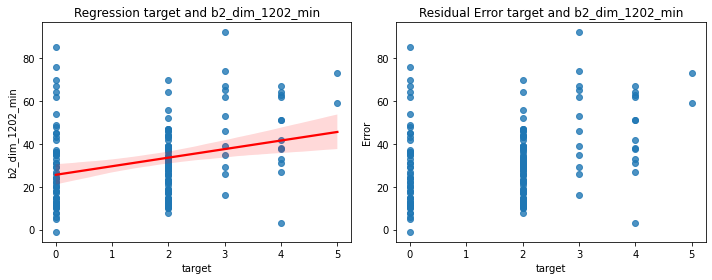

b2_dim_1202_max
slope:  4.450821420951558
intersept:  35.95199487945382
r2:  0.30909520008391395
P_value:  4.816253998276872e-05
std error:  1.0661066605537548


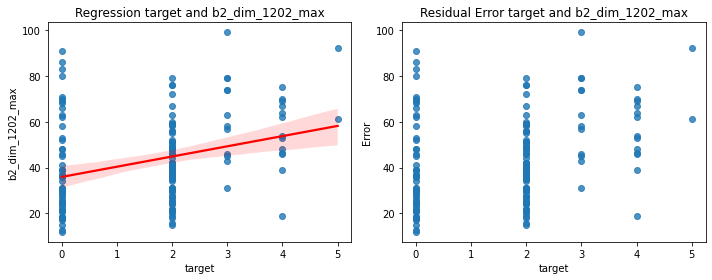

b2_dim_1202_mean
slope:  4.322724534189341
intersept:  30.479122728710536
r2:  0.3089112493151784
P_value:  4.869060993798978e-05
std error:  1.0361052564059767


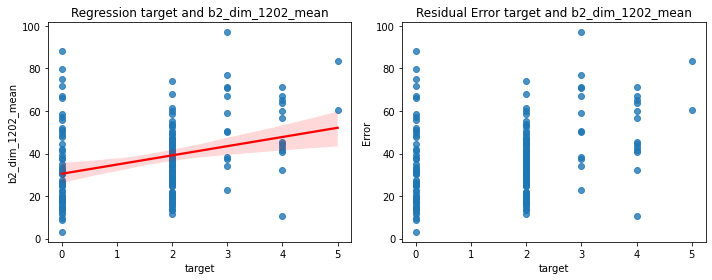

b2_dim_1202_med
slope:  4.335361543042194
intersept:  30.445046476599305
r2:  0.30771192927420554
P_value:  5.226911172052253e-05
std error:  1.0436106018765852


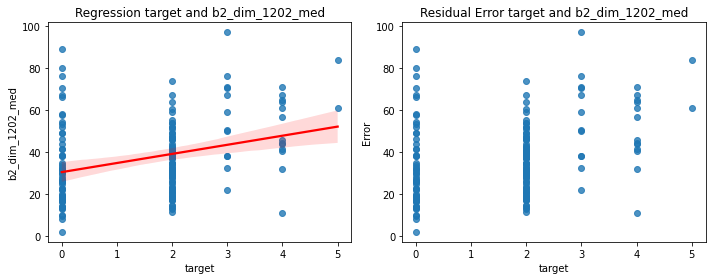

b2_dim_1202_std
slope:  0.11546969531076318
intersept:  2.9049826452100143
r2:  0.07792509898902529
P_value:  0.3168395757224707
std error:  0.11500747739266935


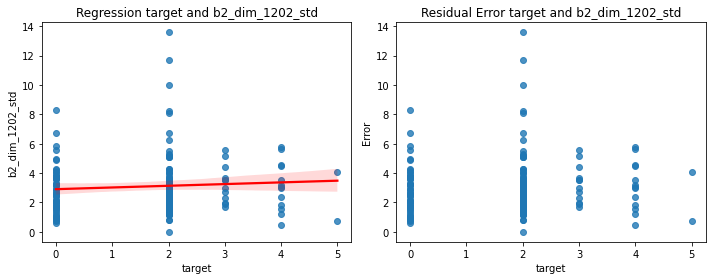

b3_dim_1202_min
slope:  -0.6092859428815247
intersept:  39.220560669328535
r2:  -0.058955861183845416
P_value:  0.44916140522831816
std error:  0.8031490037728236


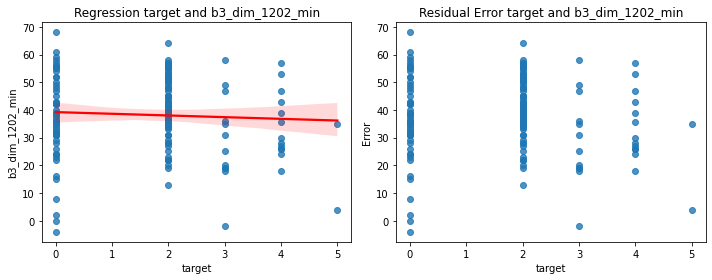

b3_dim_1202_max
slope:  -1.552284343165756
intersept:  52.39626467619232
r2:  -0.146244463462536
P_value:  0.05931487492231626
std error:  0.8174388295336824


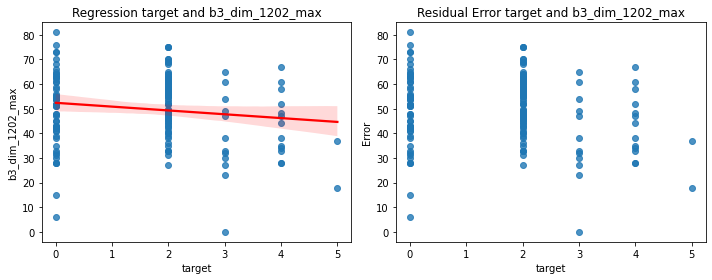

b3_dim_1202_mean
slope:  -1.1100886118475197
intersept:  45.84934920826414
r2:  -0.10969338090633868
P_value:  0.15819570859316942
std error:  0.783080756777297


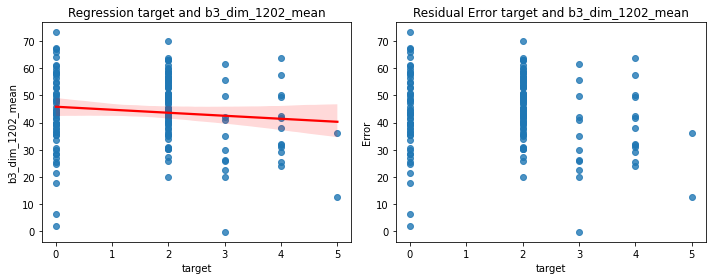

b3_dim_1202_med
slope:  -1.1113226803893879
intersept:  45.71503937534431
r2:  -0.10818204358130988
P_value:  0.1640413468283744
std error:  0.7950358000344583


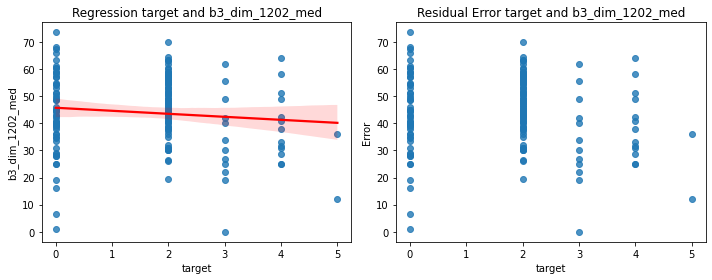

b3_dim_1202_std
slope:  -0.2019049704635012
intersept:  3.5292453503058545
r2:  -0.14271937843583699
P_value:  0.06578022593060945
std error:  0.10900675019985784


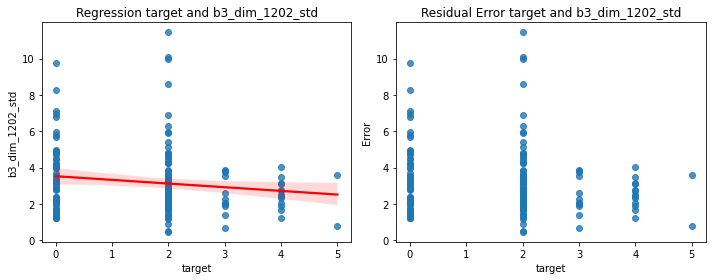

ratio32m
slope:  -410866.86129720404
intersept:  14971228.008278213
r2:  -0.3262174437256493
P_value:  1.6904577340898612e-05
std error:  92687.08239204576


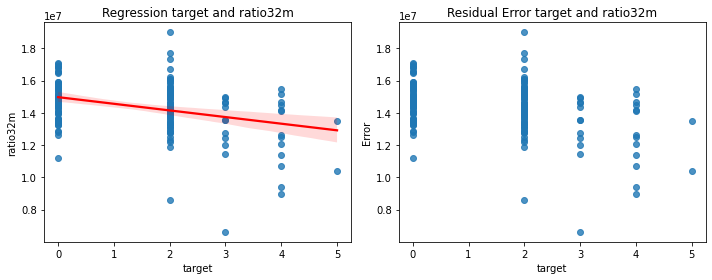

ratio42m
slope:  3918301.8060806403
intersept:  25667832.486195877
r2:  0.5617749546721915
P_value:  2.8251994294551854e-15
std error:  449212.01443027955


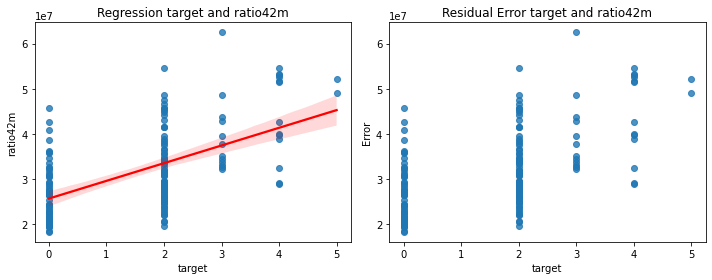

ratio43m
slope:  4053200.171623633
intersept:  16735179.531085994
r2:  0.5032645429836853
P_value:  4.16037310908236e-12
std error:  541801.2892530989


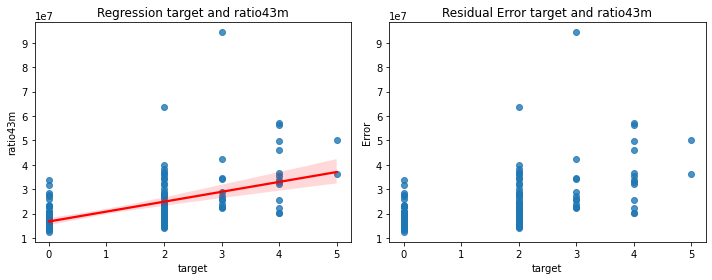

ratio52m
slope:  1519574.1661830565
intersept:  33141348.875016004
r2:  0.2796541838244457
P_value:  0.00025213018295038643
std error:  406139.69466918113


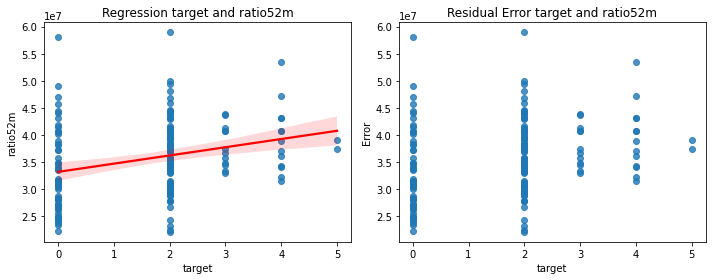

ratio53m
slope:  2003274.5741625726
intersept:  22022850.63725198
r2:  0.4348994801413839
P_value:  4.28327447752589e-09
std error:  322911.27605282667


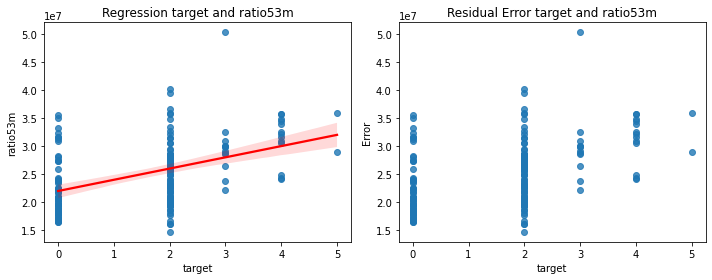

ratio54m
slope:  -726984.0470023451
intersept:  12714134.01442287
r2:  -0.4587717719532787
P_value:  4.51356875262924e-10
std error:  109615.0321845609


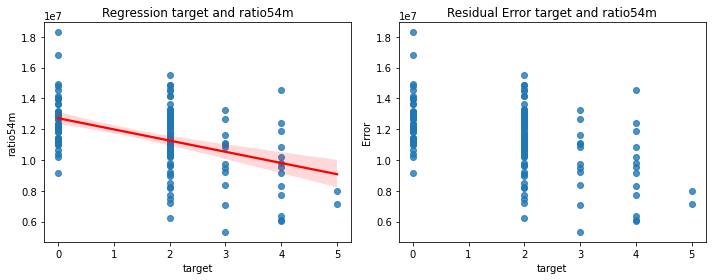

ratio62m
slope:  -185482.2779816509
intersept:  22811450.996330276
r2:  -0.050181392417919905
P_value:  0.519561368239402
std error:  287389.0635832102


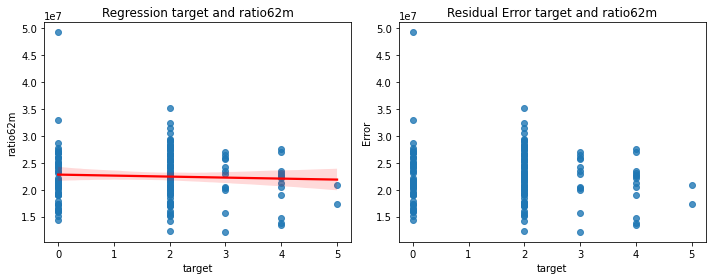

ratio63m
slope:  323427.863345423
intersept:  15252369.1681246
r2:  0.1396507936724832
P_value:  0.07186666507969627
std error:  178531.69620831584


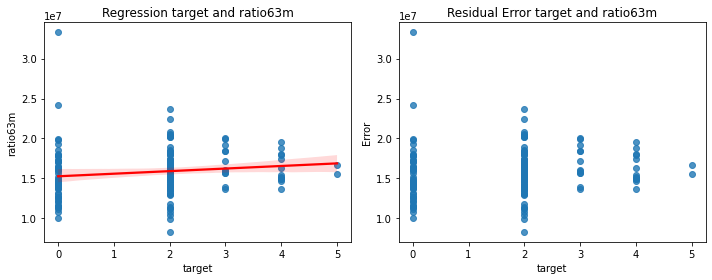

ratio64m
slope:  -811796.783166203
intersept:  8822893.112310644
r2:  -0.47397597319108503
P_value:  9.80944554695166e-11
std error:  117407.81882323383


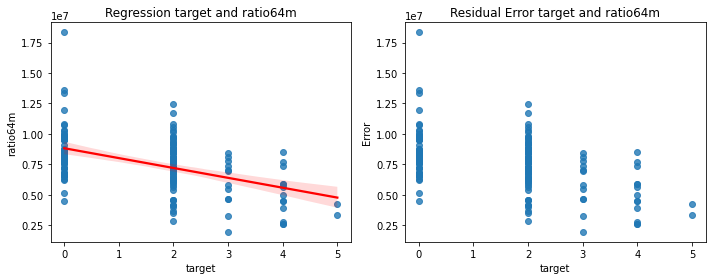

ratio65m
slope:  -335829.5778323014
intersept:  6929788.2966929795
r2:  -0.4367818269113182
P_value:  3.6093636707829914e-09
std error:  53845.09577621903


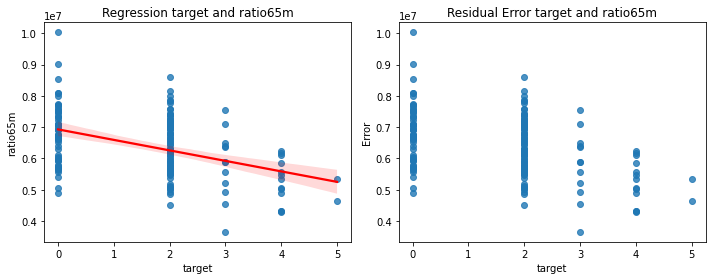

GSAVIm
slope:  116168.77211435861
intersept:  2630335.0608491576
r2:  0.33524254844973844
P_value:  9.48523068280249e-06
std error:  25415.577483892324


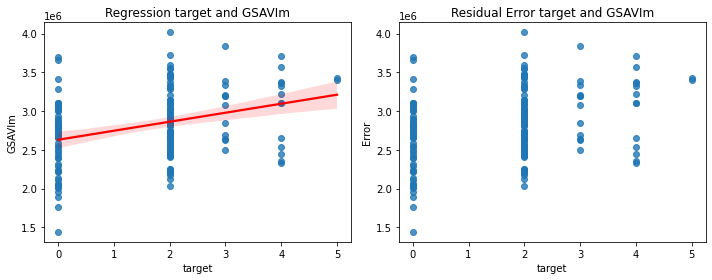

GNDVIm
slope:  427983.2721356937
intersept:  4339982.875186688
r2:  0.5607796298632616
P_value:  3.2376939548151388e-15
std error:  49193.14901010026


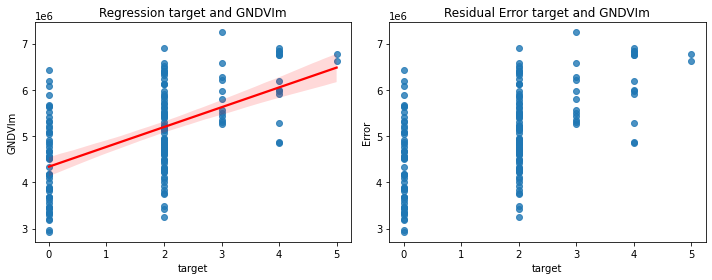

CVIm
slope:  3688178.7602944225
intersept:  39104215.91785792
r2:  0.4441588683875984
P_value:  1.8266598702705875e-09
std error:  579181.2296741657


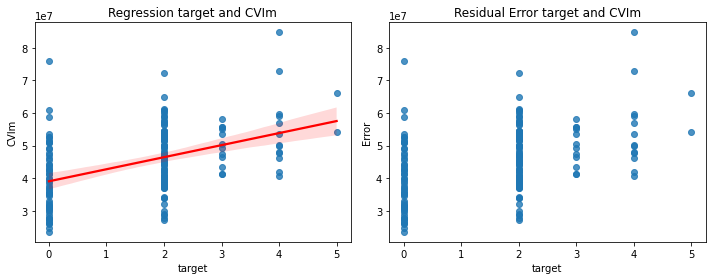

NDGIm
slope:  158893.04661830558
intersept:  -1987603.6724983992
r2:  0.32944838501948176
P_value:  1.3774378567544399e-05
std error:  35450.90970172165


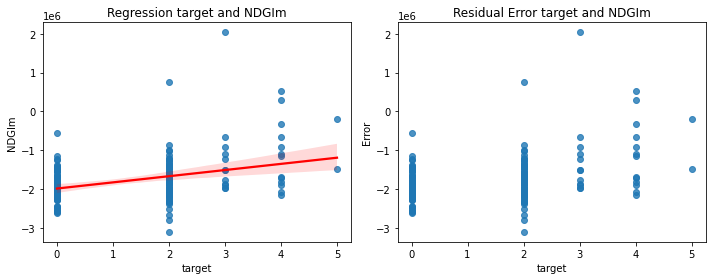

RIm
slope:  -158893.04661830558
intersept:  1987603.6724983992
r2:  -0.32944838501948176
P_value:  1.3774378567544399e-05
std error:  35450.90970172165


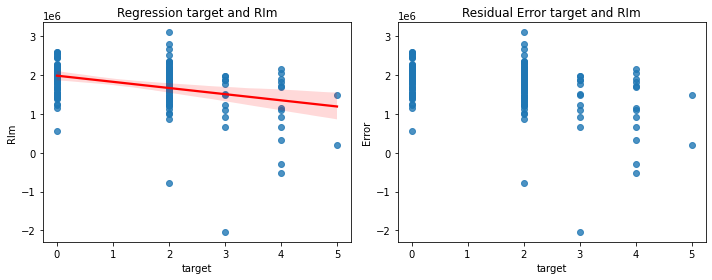

NBRm
slope:  576923.9683592904
intersept:  676567.337443996
r2:  0.4966675399966469
P_value:  8.704331414570514e-12
std error:  78487.5860216087


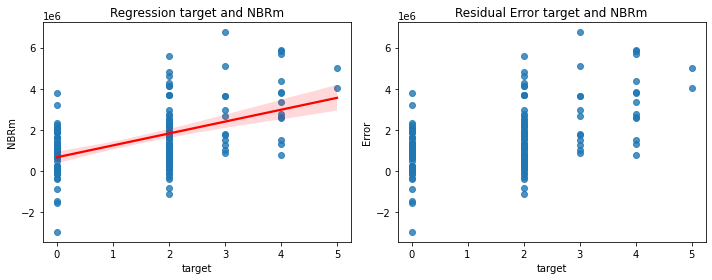

NDIIm
slope:  354083.181672711
intersept:  -1194169.915937699
r2:  0.4719463442645675
P_value:  1.2078866797477377e-10
std error:  51493.89190374722


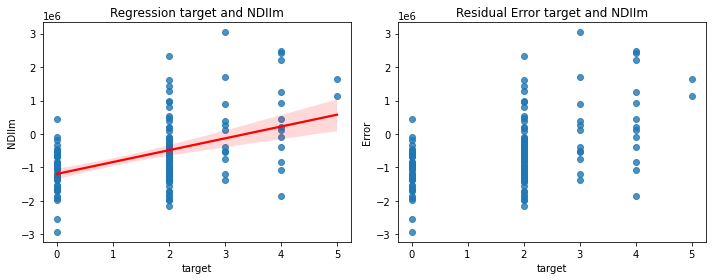

GDVIm
slope:  18376.317473863826
intersept:  1494285.3424365267
r2:  0.08980563776440699
P_value:  0.24843393449993148
std error:  15865.527180263149


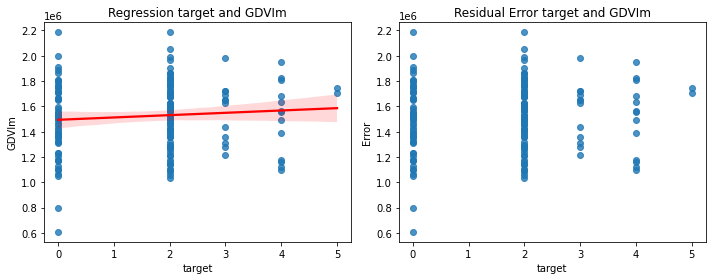

MSAVIm
slope:  215401.79470876843
intersept:  1502133.4442927253
r2:  0.4815687055130398
P_value:  4.448638483174385e-11
std error:  30517.966452696433


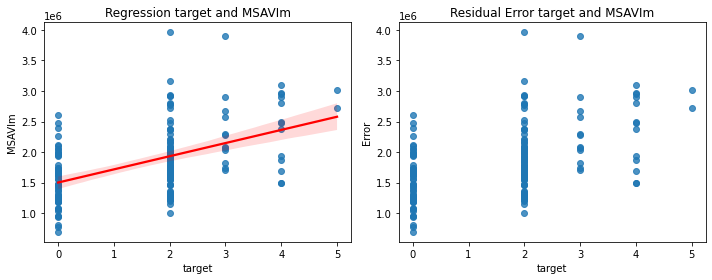

DVIm
slope:  94691.27373586502
intersept:  1011535.950501387
r2:  0.3991288898474907
P_value:  9.148687032025196e-08
std error:  16934.57672987557


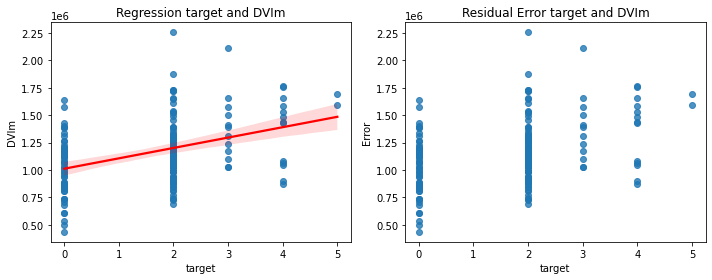

SAVIm
slope:  246729.8887347978
intersept:  1693262.2297845113
r2:  0.5067968719663986
P_value:  2.783702599954773e-12
std error:  32672.783218283053


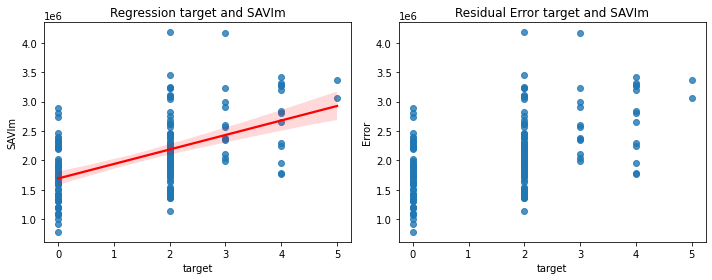

NDVIm
slope:  607590.3874759964
intersept:  2608557.183870281
r2:  0.570812848650971
P_value:  8.024928905218026e-16
std error:  68039.44469934911


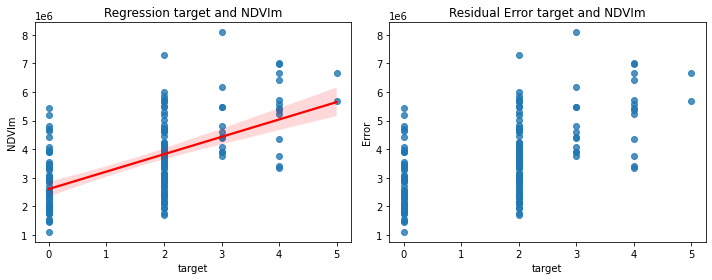

MSRm
slope:  1215161.8884787688
intersept:  3012982.4577341615
r2:  0.5404545098793868
P_value:  4.751423004304686e-14
std error:  147272.5192757975


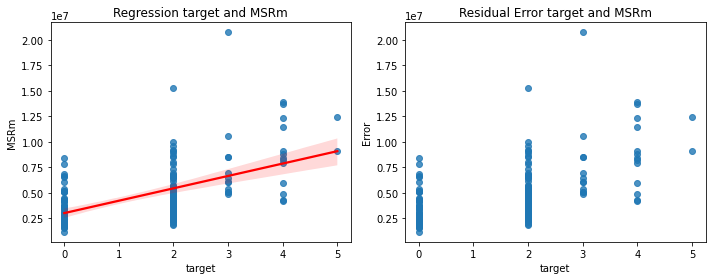

In [46]:
for i in model_data.columns[1:]:
    print(i)
    value_x = 'target'
    value_y_loop = str(i)
    plt.figure(figsize=(10,4))
    # left plot
    plt.subplot(1,2,1)
    sns.regplot(model_data[value_x], model_data[value_y_loop], line_kws={"color":"red"})
    plt.xlabel(value_x)
    plt.ylabel(value_y_loop)
    plt.title("Regression {0} and {1}".format(value_x, value_y_loop))
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(model_data[value_x], model_data[value_y_loop])

    print("slope: ", slope)
    print("intersept: ", intercept)
    print("r2: ", r_value)
    print("P_value: ", p_value)
    print("std error: ", std_err)

    # right plot
    plt.subplot(1,2,2)
    sns.regplot(model_data[value_x], model_data[value_y_loop], lowess=True, line_kws={"color":"green"})
    plt.xlabel(value_x)
    plt.ylabel("Error")
    plt.title("Residual Error {0} and {1}".format(value_x, value_y_loop))
    plt.tight_layout()
    plt.show()
    
#     slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[value_x], df[value_y])

#     print("slope: ", slope)
#     print("intersept: ", intercept)
#     print("r2: ", r_value)
#     print("P_value: ", p_value)
#     print("std error: ", std_err)

slope:  1215161.8884787688
intersept:  3012982.4577341615
r2:  0.5404545098793868
P_value:  4.751423004304686e-14
std error:  147272.5192757975


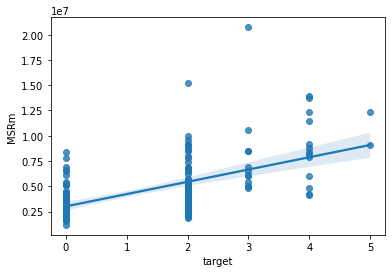

In [47]:
# value_x = 'bio_agb_kg1ha'
# value_y = 'b2_dbi_mean'
sns.regplot(x= value_x, y=value_y, data=df)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[value_x], df[value_y])

print("slope: ", slope)
print("intersept: ", intercept)
print("r2: ", r_value)
print("P_value: ", p_value)
print("std error: ", std_err)

slope:  1215161.8884787688
intersept:  3012982.4577341615
r2:  0.5404545098793868
P_value:  4.751423004304686e-14
std error:  147272.5192757975


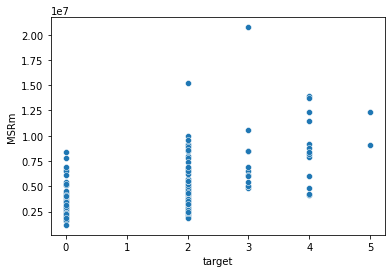

In [48]:
# value_x = 'bio_agb_kg1ha'
# value_y = 'b3_dbi_mean'
sns.scatterplot(x= value_x, y=value_y, data=df)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[value_x], df[value_y])

print("slope: ", slope)
print("intersept: ", intercept)
print("r2: ", r_value)
print("P_value: ", p_value)
print("std error: ", std_err)

In [49]:
# randomly split data into train and test datasets, the user needs to define the variables 
xdata1 = model_data.iloc[:, 1:].astype('float32')
ydata1 = model_data[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()

X_1, X_2, y_1, y_2 = train_test_split(xdata1, ydata, train_size=0.70)  
         
print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)

(116, 158) (116,)
(51, 158) (51,)


### Plot up Histograms of  train and test datasets

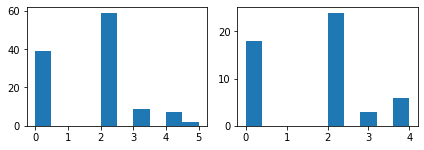

In [50]:
plt.subplot(2, 2, 1)
plt.hist(y_1)
plt.subplot(2, 2, 2)
plt.hist(y_2)
plt.tight_layout()

### Parameterise the Random Forest Regressor alogorthim

for details see: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [51]:
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [52]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [57]:
# diabetes = load_diabetes()

X = model_data.iloc[:, 1:].astype('int')
y = model_data[[value_x]].astype('int')

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

mse=mean_squared_error(y, y_pred)

print(np.sqrt(mse))

0.0006366653795641502


In [58]:
y

target
0         0
1         0
2         0
3         0
4         0
..      ...
162       4
163       5
164       4
165       3
166       2

[167 rows x 1 columns]

In [59]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

print(confusion_matrix(y, y_pred))

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got [0 2 3 4 5]

In [40]:
n_est = 300
rs = 1
maxd = 4

rng = np.random.RandomState(rs)
rfrModel_1 = abr(dtr(max_depth=maxd), n_estimators=n_est, random_state=rng)
print(rfrModel_1)
mdl = "abr"
str_model = f"rf_{abr}_{model_data_name}_n_est_{n_est}_rs_{rs}_maxd_{maxd}_{date_time_str}"
print(str_model)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=300,
                  random_state=RandomState(MT19937) at 0x1DF2E30F048)
rf_<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>_all_values_n_est_300_rs_1_maxd_4_20230203_092138


In [41]:
n_est = 100
lr=0.1
rs = 1
maxd = 4
loss = 'squared_error'

rfrModel_1 = gbr(n_estimators=n_est, learning_rate=lr, max_depth=maxd, random_state=1, loss=loss)
print(rfrModel_1)
mdl = "gbr"
str_model = f"rf_{mdl}_{model_data_name}_n_est_{n_est}_lr{lr}_{loss}_rs_{rs}_maxd_{maxd}_{date_time_str}"
print(str_model)

GradientBoostingRegressor(max_depth=4, random_state=1)
rf_gbr_all_values_n_est_100_lr0.1_squared_error_rs_1_maxd_4_20230203_092138


In [42]:
# rfrModel_1 = etr(n_estimators=100, bootstrap=True, oob_score=True,  max_features='log2', min_samples_split=1,n_jobs=-1) 
# rfrModel_1

In [43]:
# rfrModel_1 = rfr(n_estimators=100, oob_score=True,  max_depth=None, max_features='log2', min_samples_split=1.0,n_jobs=-1) 
# rfrModel_1,

In [44]:
# rfrModel_1 = rfr(n_estimators=100, oob_score=True) #,  max_depth=None, max_features='log2', min_samples_split=1.0,n_jobs=-1) 
# rfrModel_1,

In [45]:
np.nan_to_num(X_1)

array([[1.1309701e+01, 2.2308666e+01, 1.7247610e+01, ..., 2.6816570e+06,
        4.6156280e+06, 6.4755990e+06],
       [5.6579709e-01, 4.2191148e+00, 1.8699780e+00, ..., 1.5972480e+06,
        2.0135420e+06, 2.2647430e+06],
       [6.8033609e+00, 1.7199116e+01, 1.1248076e+01, ..., 1.4147540e+06,
        1.8906970e+06, 2.1091010e+06],
       ...,
       [5.6579709e-01, 5.2614689e+00, 2.1250274e+00, ..., 1.8492680e+06,
        2.9120130e+06, 3.4969460e+06],
       [6.8033609e+00, 1.7199116e+01, 1.1248076e+01, ..., 2.2563050e+06,
        3.4823780e+06, 4.3826410e+06],
       [1.7380726e+01, 3.4327137e+01, 2.4237186e+01, ..., 3.2353710e+06,
        6.1915450e+06, 1.0619102e+07]], dtype=float32)

### Fit random forest regressor model and compute variable importance score 

may need to restrict the number of variables for the bar graph to be legible



In [46]:
rfrLCHM = rfrModel_1.fit(X_1, y_1)

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


plot saved to: F:\cdu\data\zonal_stats\output\20230203\ml_rf_reg_dir\season_climate_fillna_mean_fms_NOT_si_reg\20230203_092138\all_values\rf_gbr_all_values_n_est_100_lr0.1_squared_error_rs_1_maxd_4_20230203_092138_plot.jpg


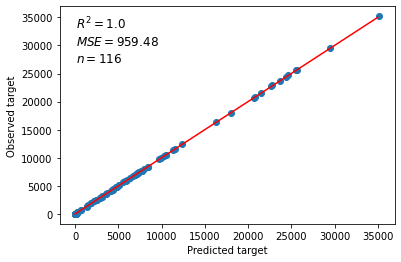

In [47]:
feature_importance = rfrModel_1.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrModel_1.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]
#fiResult = [(value,cols[i]) for (i,value) in fi if value > 0.001]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]
#print fiResult
r2 = round(rfrLCHM.score(X_1, y_1), 2)
mse = round(np.mean((y_1 - rfrLCHM.predict(X_1))**2), 2)
# print(r2)
# print('Fitted model r2 =' ,  format(rfrLCHM.score(X_1, y_1), '.2f'))
# print('Fitted model mse =', format(np.mean((y_1 - rfrLCHM.predict(X_1))**2), '.2f'))
# print('n =', len(y_1))
plt.scatter(rfrLCHM.predict(X_1), y_1,)  
# data for the 1 for 1 line
x = [0,35000]
y = [0,35000]

#sets the limits of the axis
#plt.xlim(-1,35)
#plt.ylim(-1,35)

plt.ylabel('Observed target')

plt.xlabel('Predicted target')

# 1 for 1 line
#adding text inside the plot
plt.text(100, 33000, f'$R^2 = {r2}$', fontsize = 12)
plt.text(100, 30000, f'$MSE = {mse}$', fontsize = 12)
plt.text(100, 27000, f'$n = {len(y_1)}$', fontsize = 12)


plt.plot(x, y, color = 'r')

plot_out = os.path.join(model_outputs, f'{str_model}_plot.jpg')
plt.savefig(plot_out,dpi=600)# save out your figure to a pdf 
print(f"plot saved to: {plot_out}")


                   band                      n
90      b1_dim_0608_min  9.844394911443966e-05
2    b1_fpca2_0509_mean  9.084339119076646e-05
128     b2_dim_1202_med  9.057297935914563e-07
38      b6_dbi_0608_med  8.804526395298302e-09
98      b2_dim_0608_med  8.687252554320246e-07
..                  ...                    ...
135         rain_d_mean                    0.0
46      b1_dp1_0112_max                    0.0
50      b2_dp1_0112_min                    0.0
100     b3_dim_0608_min                    0.0
65      b2_dp1_0509_min                    0.0

[175 rows x 2 columns]


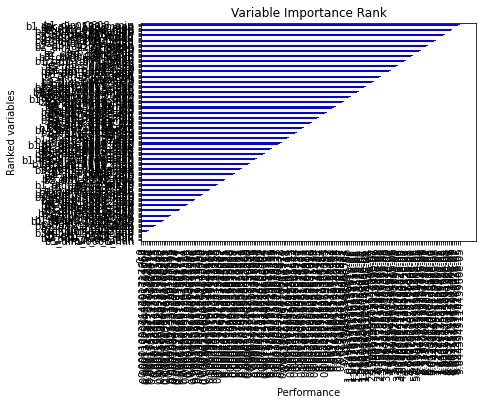

In [48]:
fiResult = np.array(fiResult)
score = (fiResult[:,0])
band = fiResult[:,1]
a = fiResult[np.argsort(fiResult[:, 1])]

df_band = pd.DataFrame(dict(band=band,n=score))
df_band['n'].astype('float')
dfsort = df_band.sort_values(['n'], ascending=[False])
print(dfsort)
 
## my complicated way to get the bar plot to sort in ascending order and display the assocated band names in the y axis
dfsort2 = df_band.sort_values(['n'], ascending=[True])
b = dfsort2[['band']]
c = b.values.tolist()
# convert the list of band names in the correct order to a string
e = str(c)
# strips all the rubbish from the string
f = e.replace('[','').replace(']','').replace("'",'').replace(",",' ')
# convert the cleaned up string back into a list to plot the band names in the bar graph
g = f.split()
 
ind = np.arange(len(df_band))
width = 0.4
 
fig, ax = plt.subplots()
ax.barh(ind, dfsort2.n, width, color='blue')
ax.set(yticks=ind + width, yticklabels= g, ylim=[2*width - 1, len(df_band)])
ax.set_xlabel('Performance')
ax.set_ylabel('Ranked variables')
plt.xticks(rotation='vertical')
ax.set_title('Variable Importance Rank')

plt.show()
plot_out = os.path.join(model_outputs, f'{str_model}_feature_importance_plot.jpg')
fig.savefig(plot_out,dpi=600)# save out your figure to a pdf 

In [49]:
dfsort['n'].astype('float')
dfsort.info()
dfsort['n'] = dfsort['n'].astype('float')
dfsort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 90 to 65
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   band    175 non-null    object
 1   n       175 non-null    object
dtypes: object(2)
memory usage: 4.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 90 to 65
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   band    175 non-null    object 
 1   n       175 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.1+ KB


In [50]:
num_bf_selection = 0.01
df_var = dfsort[dfsort['n'] > num_bf_selection]

In [51]:
column_var = df_var.band.tolist()

In [52]:
column_var.insert(0, 'target')

In [53]:
select_model_data = df_ml[column_var]

In [54]:
df_corr = select_model_data.corr()
df_corr.to_csv(os.path.join(model_outputs, f'{str_model}_feature_imp_n_{num_bf_selection}_.csv'), index=False)
df_corr

target  b1_h99a_01122_max  b2_dbi_0608_mean  \
target               1.00               0.65             -0.57   
b1_h99a_01122_max    0.65               1.00             -0.70   
b2_dbi_0608_mean    -0.57              -0.70              1.00   
b2_dbi_0608_med     -0.58              -0.70              1.00   
b3_dbi_0608_max     -0.56              -0.68              0.94   
b2_dp1_0112_std      0.12               0.20             -0.20   
b2_dbi_0608_min     -0.57              -0.70              0.98   
b2_dbi_0608_max     -0.53              -0.66              0.97   
b2_dp1_0509_std      0.18               0.26             -0.29   

                   b2_dbi_0608_med  b3_dbi_0608_max  b2_dp1_0112_std  \
target                       -0.58            -0.56             0.12   
b1_h99a_01122_max            -0.70            -0.68             0.20   
b2_dbi_0608_mean              1.00             0.94            -0.20   
b2_dbi_0608_med               1.00             0.94            -0.20   
b3_dbi_0608_max               0.94             1.00            -0.10   
b2_dp1_0112_std              -0.20            -0.10             1.00   
b2_dbi_0608_min               0.98             0.87            -0.27   
b2_dbi_0608_max               0.97             0.97            -0.11   
b2_dp1_0509_std              -0.30            -0.19             0.83   

                   b2_dbi_0608_min  b2_dbi_0608_max  b2_dp1_0509_std  
target                       -0.57            -0.53             0.18  
b1_h99a_01122_max            -0.70            -0.66             0.26  
b2_dbi_0608_mean              0.98             0.97            -0.29  
b2_dbi_0608_med               0.98             0.97            -0.30  
b3_dbi_0608_max               0.87             0.97            -0.19  
b2_dp1_0112_std              -0.27            -0.11             0.83  
b2_dbi_0608_min               1.00             0.90            -0.35  
b2_dbi_0608_max               0.90             1.00            -0.21  
b2_dp1_0509_std              -0.35            -0.21             1.00

In [55]:
variable_imp_list = dfsort.band.to_list()

In [56]:
variable_imp_list

['b1_dim_0608_min',
 'b1_fpca2_0509_mean',
 'b2_dim_1202_med',
 'b6_dbi_0608_med',
 'b2_dim_0608_med',
 'b3_dp1_0112_mean',
 'ratio64m',
 'b1_dp1_0509_min',
 'b2_dbi_0608_std',
 'b3_dim_0608_mean',
 'b3_dp1_0509_med',
 'et_mp_mean',
 'b2_dim_0305_mean',
 'b1_dim_1202_med',
 'b3_dim_0911_min',
 'MSAVIm',
 'b2_dp1_0509_mean',
 'rain_m_mean',
 'b2_dim_1202_mean',
 'ratio54m',
 'ratio32m',
 'NBRm',
 'evp_ml_mean',
 'b2_dim_1202_min',
 'ratio43m',
 'b1_dim_0305_min',
 'b3_dbi_0608_mean',
 'NDIIm',
 'et_mw_mean',
 'b1_dp1_0509_mean',
 'b2_dim_0305_max',
 'DVIm',
 'SAVIm',
 'b5_dbi_0608_max',
 'b2_dim_0608_std',
 'NDGIm',
 'b1_dim_0911_std',
 'b1_dim_0305_med',
 'b4_dbi_0608_max',
 'GSAVIm',
 'b3_dp1_0509_min',
 'b3_dim_0305_med',
 'tmin_mean',
 'RIm',
 'ratio62m',
 'ratio52m',
 'b3_dim_0608_max',
 'b5_dbi_0608_std',
 'b3_dim_0911_med',
 'b3_dim_0305_max',
 'b3_dim_0305_mean',
 'b2_dp1_0112_med',
 'b1_dim_0305_mean',
 'b1_dim_0305_std',
 'b1_fpca2_0509_max',
 'b4_dbi_0608_mean',
 'b1_dim_1202

### Run same model and same peramiters with selected features

In [57]:
# randomly split data into train and test datasets, the user needs to define the variables 
xdata1 = select_model_data.iloc[:, 1:].astype('float32')
ydata1 = select_model_data[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()

X_1, X_2, y_1, y_2 = train_test_split(xdata1, ydata, train_size=0.70)  
         
print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)

(116, 8) (116,)
(51, 8) (51,)


In [58]:
if mdl == "abr":
    
    rng = np.random.RandomState(rs)
    rfrModel_1 = abr(dtr(max_depth=maxd), n_estimators=n_est, random_state=rng)
    str_model = f"rf_abr_{model_data_name}_slc_feat_n_est_{n_est}_rs_{rs}_maxd_{maxd}_{date_time_str}"
    print(str_model)


elif mdl== gbr:
    rfrModel_1 = gbr(n_estimators=n_est, learning_rate=lr, max_depth=maxd, random_state=1, loss=loss)
    str_model = f"rf_gbr_{model_data_name}_slc_feat_n_est_{n_est}_lr{lr}_{loss}_rs_{rs}_maxd_{maxd}_{date_time_str}"
    print(str_model)
else:
    pass
        

In [59]:
np.nan_to_num(X_1)

array([[5.57479858e+00, 9.27359985e+02, 9.39000000e+02, 1.48400000e+03,
        6.84934914e-01, 8.35000000e+02, 9.99000000e+02, 3.14269692e-01],
       [1.52886353e+01, 5.57919983e+02, 5.53000000e+02, 9.27000000e+02,
        2.74873710e+00, 5.20000000e+02, 6.39000000e+02, 3.52766848e+00],
       [1.24672699e+01, 5.84875000e+02, 5.67000000e+02, 1.02500000e+03,
        2.62936878e+00, 5.10000000e+02, 7.15000000e+02, 2.62466931e+00],
       [8.60382080e+00, 5.80640015e+02, 5.79000000e+02, 1.00800000e+03,
        4.77131367e+00, 4.90000000e+02, 6.57000000e+02, 1.85259247e+00],
       [1.40396500e+01, 4.50950012e+02, 4.44000000e+02, 6.54000000e+02,
        1.76383424e+00, 4.24000000e+02, 5.00000000e+02, 2.45452476e+00],
       [1.80340652e+01, 3.60399994e+02, 3.60000000e+02, 3.45000000e+02,
        1.32024825e+00, 3.49000000e+02, 3.76000000e+02, 1.29903805e+00],
       [1.22254772e+01, 8.90549988e+02, 8.74000000e+02, 1.45000000e+03,
        3.82970834e+00, 7.68000000e+02, 1.03700000e+03, 2.

### Fit random forest regressor model and compute variable importance score 

may need to restrict the number of variables for the bar graph to be legible



In [60]:
rfrLCHM = rfrModel_1.fit(X_1, y_1)

##### good info on the feature importance score - http://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined

plot saved to: F:\cdu\data\zonal_stats\output\20230203\ml_rf_reg_dir\season_climate_fillna_mean_fms_NOT_si_reg\20230203_092138\all_values\rf_gbr_all_values_n_est_100_lr0.1_squared_error_rs_1_maxd_4_20230203_092138_select_feat_plot.jpg


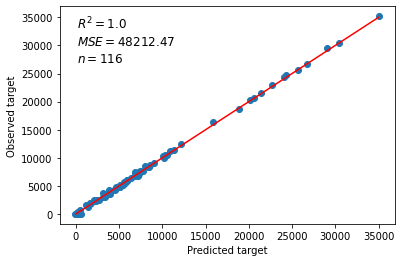

In [61]:
feature_importance = rfrModel_1.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrModel_1.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]
#fiResult = [(value,cols[i]) for (i,value) in fi if value > 0.001]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]
#print fiResult
r2 = round(rfrLCHM.score(X_1, y_1), 2)
mse = round(np.mean((y_1 - rfrLCHM.predict(X_1))**2), 2)
# print(r2)
# print('Fitted model r2 =' ,  format(rfrLCHM.score(X_1, y_1), '.2f'))
# print('Fitted model mse =', format(np.mean((y_1 - rfrLCHM.predict(X_1))**2), '.2f'))
# print('n =', len(y_1))
plt.scatter(rfrLCHM.predict(X_1), y_1,)  
# data for the 1 for 1 line
x = [0,35000]
y = [0,35000]

#sets the limits of the axis
#plt.xlim(-1,35)
#plt.ylim(-1,35)

plt.ylabel('Observed target')

plt.xlabel('Predicted target')

# 1 for 1 line
#adding text inside the plot
plt.text(100, 33000, f'$R^2 = {r2}$', fontsize = 12)
plt.text(100, 30000, f'$MSE = {mse}$', fontsize = 12)
plt.text(100, 27000, f'$n = {len(y_1)}$', fontsize = 12)


plt.plot(x, y, color = 'r')

plot_out = os.path.join(model_outputs, f'{str_model}_select_feat_plot.jpg')
plt.savefig(plot_out,dpi=600)# save out your figure to a pdf 
print(f"plot saved to: {plot_out}")


                band                    n
0  b1_h99a_01122_max  0.44194537440054765
5    b2_dbi_0608_min  0.10848282747136136
1   b2_dbi_0608_mean  0.10011515374117817
2    b2_dbi_0608_med  0.08824061069788634
4    b2_dp1_0112_std  0.08621358125467442
7    b2_dp1_0509_std   0.0759778276604632
3    b3_dbi_0608_max  0.05656147719923026
6    b2_dbi_0608_max  0.04246314757465859


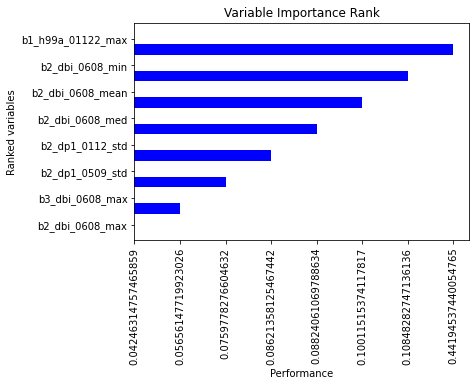

In [62]:
fiResult = np.array(fiResult)
score = (fiResult[:,0])
band = fiResult[:,1]
a = fiResult[np.argsort(fiResult[:, 1])]

df_band = pd.DataFrame(dict(band=band,n=score))
df_band['n'].astype('float')
dfsort = df_band.sort_values(['n'], ascending=[False])
print(dfsort)
 
## my complicated way to get the bar plot to sort in ascending order and display the assocated band names in the y axis
dfsort2 = df_band.sort_values(['n'], ascending=[True])
b = dfsort2[['band']]
c = b.values.tolist()
# convert the list of band names in the correct order to a string
e = str(c)
# strips all the rubbish from the string
f = e.replace('[','').replace(']','').replace("'",'').replace(",",' ')
# convert the cleaned up string back into a list to plot the band names in the bar graph
g = f.split()
 
ind = np.arange(len(df_band))
width = 0.4
 
fig, ax = plt.subplots()
ax.barh(ind, dfsort2.n, width, color='blue')
ax.set(yticks=ind + width, yticklabels= g, ylim=[2*width - 1, len(df_band)])
ax.set_xlabel('Performance')
ax.set_ylabel('Ranked variables')
plt.xticks(rotation='vertical')
ax.set_title('Variable Importance Rank')

plt.show()
plot_out = os.path.join(model_outputs, f'{str_model}_select_features_feature_importance_plot.jpg')
fig.savefig(plot_out,dpi=600)# save out your figure to a pdf 

### Predict the selected model on the test data

In [63]:
# plt.scatter(y2_predict, y_2)
# plt.show()

Predicted data r2 = 0.7251622537943359
MSE = 13333392.018
RMSE = 3651.492
bias = -253.075
n = 51


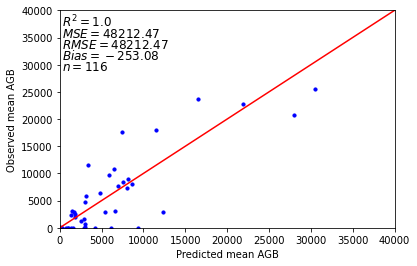

In [64]:
y2_predict = rfrLCHM.predict(X_2)

print('Predicted data r2 =', rfrLCHM.score(X_2, y_2))
print('MSE =', format(np.mean((y_2 - rfrLCHM.predict(X_2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((y2_predict - y_2) ** 2)), '.3f'))
#print 'explained_var =',format(explained_variance_score(y_2, y2_predict),  '.3f') 
print('bias =' , format(np.mean(y_2) - np.mean(y2_predict), '.3f'))
print('n =' , len(y_2))


r2 = round(rfrLCHM.score(X_1, y_1), 2)
mse = round(np.mean((y_1 - rfrLCHM.predict(X_1))**2), 2)
rmse = round(np.sqrt(np.mean((y2_predict - y_2) ** 2)), 2)
bias = round(np.mean(y_2) - np.mean(y2_predict), 2)

plt.scatter(y2_predict, y_2 ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,40000]
y = [-1,40000]

#sets the limits of the axis
plt.xlim(-1,40000)
plt.ylim(-1, 40000)
plt.ylabel('Observed mean AGB')
plt.xlabel('Predicted mean AGB')
# 1 for 1 line

#adding text inside the plot
plt.text(300, 37000, f'$R^2 = {r2}$', fontsize = 12)
plt.text(300, 35000, f'$MSE = {mse}$', fontsize = 12)
plt.text(300, 33000, f'$RMSE = {mse}$', fontsize = 12)
plt.text(300, 31000, f'$Bias = {bias}$', fontsize = 12)
plt.text(300, 29000, f'$n = {len(y_1)}$', fontsize = 12)

plt.plot(x, y, color = 'r')
plot_out = os.path.join(model_outputs, f'{str_model}_test_data.jpg')
fig.savefig(plot_out,dpi=600)# save out your figure to a pdf 

plt.show()

In [65]:
str_model

'rf_gbr_all_values_n_est_100_lr0.1_squared_error_rs_1_maxd_4_20230203_092138'

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = y2_predict
y = y_2

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

print(x)
print(y)
print(z)
# fig, ax = plt.subplots()
# ax.scatter(x, y, c=z, s=0.8, edgecolor='')

# # data for the 1 for 1 line
# a = [-1,25]
# b = [-1,25]

# #sets the limits of the axis
# plt.xlim(-1,25)
# plt.ylim(-1,25)
# plt.ylabel('Observed mean CHM')
# plt.xlabel('Predicted mean CHM')
# # 1 for 1 line
# ax.plot(a, b, color = 'black')

# plt.show()

[ 2.19582806e+04  1.65315039e+04  2.79709259e+04  3.05489789e+04
  7.47573197e+03  3.40671703e+03  1.14539035e+04  1.23231321e+04
  9.40129312e+03  6.08562723e+03  6.49199620e+03  5.87754934e+03
  8.59161310e+03  4.23200111e+03  8.14891229e+03  6.59410329e+03
  8.09590873e+03  7.56033258e+03  6.97600366e+03  3.16896204e+03
  5.43936724e+03  4.84371852e+03  3.00987302e+03  2.93473074e+03
  3.04035103e+03  3.03619322e+03  1.43908242e+03  1.68601294e+03
  1.32592376e+03  2.95455021e+03  1.60406385e+03  1.86788364e+03
  2.56557710e+03  1.36401313e+03 -1.88541135e+01 -4.23678184e+00
  1.03244867e+03  4.18720727e+01  4.81614703e+01  7.47228492e+01
  7.99307838e+01  7.99307838e+01  1.05238725e+02  9.39024438e+02
  1.45559753e+02  1.46980399e+02  1.57969084e+02  2.42120943e+02
  2.56618505e+02  7.22454828e+02  1.86183744e+03]
[22699.39   23737.56   20805.217  25585.07   17598.352  11596.2
 17994.76    2824.458      0.         0.     10763.322   9708.965
  8031.45       0.      8984.909   3156.

# =================================================================

# STOP - do you realy want to save this model?

# remember to change the cPickle file name !!

# Save current fitted model and apply to unseen validation data 

In [67]:
import pickle

#rfrL8CHM = rfr()
#rfrL8CHM.fit(X_1, y_1)

pkl_out = os.path.join(model_outputs, f'rf_model_{str_model}')


with open(pkl_out, 'wb') as f:
    pickle.dump(rfrLCHM, f)

## Load in unseen data here

In [68]:
# read in your validation dataset which has never been seen by rfr model - NOTE in this example I am just reading the same data used to train the model
new_data = select_model_data
# df = pd.read_csv(csv_file, header=0)
# df.shape 

In [69]:
c_list = new_data.columns.tolist()
c_list

['target',
 'b1_h99a_01122_max',
 'b2_dbi_0608_mean',
 'b2_dbi_0608_med',
 'b3_dbi_0608_max',
 'b2_dp1_0112_std',
 'b2_dbi_0608_min',
 'b2_dbi_0608_max',
 'b2_dp1_0509_std']

In [70]:
#df1 = df[(df['comp'] == 'l57')]
df1 = new_data[(new_data['target'] > 0.01)]
df1.dropna(inplace=True)
print (df1.shape)

(110, 9)


C:\Users\rmcgr\AppData\Roaming\Python\Python37\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [71]:
df1.columns

Index(['target', 'b1_h99a_01122_max', 'b2_dbi_0608_mean', 'b2_dbi_0608_med',
       'b3_dbi_0608_max', 'b2_dp1_0112_std', 'b2_dbi_0608_min',
       'b2_dbi_0608_max', 'b2_dp1_0509_std'],
      dtype='object')

In [72]:
column_var

['target',
 'b1_h99a_01122_max',
 'b2_dbi_0608_mean',
 'b2_dbi_0608_med',
 'b3_dbi_0608_max',
 'b2_dp1_0112_std',
 'b2_dbi_0608_min',
 'b2_dbi_0608_max',
 'b2_dp1_0509_std']

In [73]:
df1[column_var].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 7 to 166
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   target             110 non-null    float64
 1   b1_h99a_01122_max  110 non-null    float64
 2   b2_dbi_0608_mean   110 non-null    float64
 3   b2_dbi_0608_med    110 non-null    float64
 4   b3_dbi_0608_max    110 non-null    float64
 5   b2_dp1_0112_std    110 non-null    float64
 6   b2_dbi_0608_min    110 non-null    float64
 7   b2_dbi_0608_max    110 non-null    float64
 8   b2_dp1_0509_std    110 non-null    float64
dtypes: float64(9)
memory usage: 8.6 KB


In [74]:
df1

target  b1_h99a_01122_max  b2_dbi_0608_mean  b2_dbi_0608_med  \
7    1894.20               5.20           1153.48          1144.00   
8    1536.15              12.23            760.10           761.50   
9    1164.24              12.23           1144.50          1135.00   
10   4736.01              12.23            698.56           696.00   
12   1549.09              12.23            890.55           874.00   
..       ...                ...               ...              ...   
162 20805.22              20.42            430.12           417.00   
163 30472.45              21.59            447.75           449.00   
164 24414.13              16.81            628.84           616.00   
165 17598.35              20.05            611.56           594.00   
166  9995.51              18.40            489.80           488.50   

     b3_dbi_0608_max  b2_dp1_0112_std  b2_dbi_0608_min  b2_dbi_0608_max  \
7            1648.00             2.71          1081.00          1236.00   
8            1380.00             5.25           583.00           870.00   
9            1956.00             2.17          1088.00          1204.00   
10           1126.00             7.79           667.00           742.00   
12           1450.00             3.83           768.00          1037.00   
..               ...              ...              ...              ...   
162           585.00             3.14           396.00           485.00   
163           682.00             2.18           387.00           494.00   
164          1381.00             2.56           550.00           786.00   
165          1105.00             5.80           526.00           717.00   
166           459.00             3.05           468.00           521.00   

     b2_dp1_0509_std  
7               0.74  
8               2.85  
9               2.85  
10              2.85  
12              2.85  
..               ...  
162             1.89  
163             2.05  
164             1.89  
165             6.61  
166             2.85  

[110 rows x 9 columns]

In [75]:
xdata2 = df1[column_var].astype('float32')
xdata2.drop("target", axis=1, inplace=True)

ydata1 = df1[['target']].astype('float32')

ydata2 = ydata1.values

ydata = ydata2.ravel()

print(len(ydata1))

110


In [76]:
xdata2

b1_h99a_01122_max  b2_dbi_0608_mean  b2_dbi_0608_med  b3_dbi_0608_max  \
7                 5.20           1153.48          1144.00          1648.00   
8                12.23            760.10           761.50          1380.00   
9                12.23           1144.50          1135.00          1956.00   
10               12.23            698.56           696.00          1126.00   
12               12.23            890.55           874.00          1450.00   
..                 ...               ...              ...              ...   
162              20.42            430.12           417.00           585.00   
163              21.59            447.75           449.00           682.00   
164              16.81            628.84           616.00          1381.00   
165              20.05            611.56           594.00          1105.00   
166              18.40            489.80           488.50           459.00   

     b2_dp1_0112_std  b2_dbi_0608_min  b2_dbi_0608_max  b2_dp1_0509_std  
7               2.71          1081.00          1236.00             0.74  
8               5.25           583.00           870.00             2.85  
9               2.17          1088.00          1204.00             2.85  
10              7.79           667.00           742.00             2.85  
12              3.83           768.00          1037.00             2.85  
..               ...              ...              ...              ...  
162             3.14           396.00           485.00             1.89  
163             2.18           387.00           494.00             2.05  
164             2.56           550.00           786.00             1.89  
165             5.80           526.00           717.00             6.61  
166             3.05           468.00           521.00             2.85  

[110 rows x 8 columns]

Predicted data r2 = 0.9232923144667691
MSE = 4772111.898
RMSE = 2184.516
explained_var = 0.924
bias = 201.354
n = 110


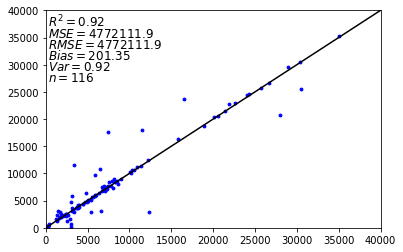

In [77]:
with open(pkl_out, 'rb') as f:
        rf = pickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print('Predicted data r2 =', rf.score(xdata2, ydata))
print('MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f'))
print('explained_var =',format(explained_variance_score(ydata, predicted),  '.3f'))
print('bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f'))
print('n =' , len(ydata))

r2 = round(rf.score(xdata2, ydata), 2)
mse = round(np.mean((ydata - rf.predict(xdata2))** 2), 2)
rmse = round(np.sqrt(np.mean((predicted - ydata) ** 2)), 2)
exp_var = round(explained_variance_score(ydata, predicted), 2)
bias = round(np.mean(ydata) - np.mean(predicted), 2)

# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=8, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,40000]
y = [-1,40000]

#sets the limits of the axis
plt.xlim(-1, 40000)
plt.ylim(-1, 40000)

#adding text inside the plot
plt.text(300, 37000, f'$R^2 = {r2}$', fontsize = 12)
plt.text(300, 35000, f'$MSE = {mse}$', fontsize = 12)
plt.text(300, 33000, f'$RMSE = {mse}$', fontsize = 12)
plt.text(300, 31000, f'$Bias = {bias}$', fontsize = 12)
plt.text(300, 29000, f'$Var = {exp_var}$', fontsize = 12)
plt.text(300, 27000, f'$n = {len(y_1)}$', fontsize = 12)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')

plot_out = os.path.join(model_outputs, f'{str_model}_unseen_data.jpg')

fig.savefig(plot_out,dpi=600)# save out your figure to a pdf 

plt.show()